
#  <img style="float: left; padding-right: 10px; width: 45px" src="ExtensionFlag.jpg">CSCI-e89: Deep Learning, Fall 2025

## Lab 02 - NN Gradients, Activations, Optimizers, Propagation
**Harvard University Extension School - Joan Imrich  13-September-2025**<br/>
<hr style="height:2pt">

<a id="top"></a>

### Core Concepts Week 02: 

- **Sigmoid, ReLU (Rectified Linear Unit), SoftMax <font color="#DC143C"> Nonlinear Activation Functions:**</font>
  [0](#0), [1](#1), [3](#3),  [7](#7)
- **Gradient Descent (GD or SGD) and Adam (Adaptive Moment Estimation) <font color="#DC143C"> Optimizers:** </font>
  [4](#4), [5](#5), [GD Hiker Analogy Table](#GD-hiker) [One-hot encoding](#One-hot-encoding)
- **NNs & Mountain Hiking Analogies <font color="#DC143C"> Gradients, Back Propagation:** </font>
  [2](#2), [2a-metrics](#2a), [5a-math](#5a), [CIFAR-10](#CIFAR-10) 
- **Gradient Tape API <font color="#DC143C"> Tensorflow, Jacobian** </font>
  [6](#6), [8a](#8a), [8b](#8b), [8c](#8c), [9a](#9a), [9b-Jacobian](#9b), [9c](#9c), [9d](#9d), [Summary](#Summary), [Appendix](#Appendix)

**References: Professor Zoran Djordjevic:** [Lecture02](https://canvas.harvard.edu/courses/164142/files/23210968?wrap=1), [Lec02_Binary_Classifier.ipynb](https://canvas.harvard.edu/courses/164142/files/23211073?wrap=1), [See e89 week2](https://canvas.harvard.edu/courses/164142/pages/week-2-2?module_item_id=1976709)

### Lab02 aims to convince you "How This All Works Together" (gradients, NN model training)

1. **Forward pass:** Input data passes through layers; activation functions transform outputs non-linearly.
2. **Loss computation:** The difference between predictions and true labels is measured.
3. **Backpropagation:** Derivatives of loss are calculated w.r.t each weight parameter.
4. **Optimization step:** Optimizers use gradients to update weights aiming to minimize the loss.


### Building upon Lecture 01, 02:
* Neurons are like summation devices
* Perceptrons cannot solve a very simple classification problem
* Neurons will not be able to perform discrimination or classifications or decision making <b> Unless </b> they are followed by a nonlinear function. So, presence of nonlinear functions is absolutely essential (for processing information) e.g. <b> SIGMOID function</b> 

Activation functions, optimizers, and backpropagation are fundamental components that together allow neural networks to learn complex patterns and perform well in tasks such as image classification or natural language processing.
This synergy is critical to the success of neural networks in learning rich representations and solving complex tasks efficiently.

### Why single neurons fail?
A single-layer perceptron (single neuron), even with step or sigmoid activation, fails for problems like XOR due to its fundamental limitation: it can only separate data using a linear decision boundary. While basic gates like AND, OR, and NOT are linearly separable and thus fully solvable, the XOR gate is not linearly separable, which means no straight line can perfectly separate the classes in the input space

***

### Why Activation Functions Matter

- Activation functions are essential in NNs because they introduce **non-linearity**, which is necessary for learning the complex relationships found in real-world data. Without them, even deep networks would be reduced to simple linear transformations, severely limiting the problems they can solve
- **Introduce non-linearity:** Without activation functions, no matter how many layers a network has, it would behave like a single linear transformation, limiting the model to solving only linearly separable problems.
- **Enable complex learning:** Non-linear activation functions such as ReLU, sigmoid, or tanh allow networks to approximate complex, real-world data patterns that are non-linear in nature.
- **Effect gradient flow:** The choice of activation affects how gradients propagate backward in training. For example, sigmoid and tanh can cause vanishing gradients, slowing or stalling learning in deep networks, while ReLU mitigates this with sparse, effective gradients.

***

### Why Optimizers Matter

- **Guide learning:** Optimizers control how model weights update during training to reduce the loss function, effectively navigating the loss landscape.
- **Convergence speed and stability:** Some optimizers (like Adam) adapt learning rates dynamically, speeding up training and avoiding getting stuck in bad regions.
- **Generalization:** Proper optimization helps models not only fit training data but also generalize well to unseen data.

***

### Why Backpropagation Matters

**Backpropagation** is a method used to train neural networks, and **gradient descent** is the algorithm that adjusts the weights to minimize errors. Together, they enable neural networks to learn from data by making small corrections to their internal parameters each step.


- **Foundation of learning:** Backpropagation computes gradients of the loss function w.r.t. model parameters efficiently via chain rule, enabling gradient-based optimizers to perform updates
- **Enables multi-layer training:** It propagates error signals backward through all layers, allowing deep networks to be trained effectively.
- **Interdependent with activation and optimizers:** Activation functions must be differentiable for backpropagation to work, and optimizers rely on accurate gradients from backpropagation.

***



<a id="0"></a>
[back](#top)

# <font color="#DC143C">Example-0 </font> 

## Demonstrates Activation Function (Sigmoid) and its derivative, manually calculating gradients and updating weights for a single neuron scenario

### What It Teaches
 How machines can learn to make better predictions through iterative updates, the building block for all supervised DL
* **fundamental NN GD mechanics - forward and backward computations for a single neuron, step-by-step**:
- Shows how the error signal and gradients steer parameter updates
- Forward pass to compute predictions.
- Loss calculation to measure error.
- Backpropagation to compute adjustment signals.
- Gradient descent to update parameters.
- **Activation Function (Sigmoid):**
  - Maps the weighted sum of inputs to a non-linear output between 0 and 1, enabling the neuron to learn complex boundaries—not just linear ones.
  - **Role of sigmoid:** Enables differentiation and non-linearity, both essential for learning via backpropagation
- **Derivative for Backpropagation:**
  - The derivative of the sigmoid, $$ x * (1 - x) $$, is used to compute how much changes in weights or bias affect the output error, crucial for the chain rule in gradient calculations

### How a neuron learns:
By iteratively adjusting weights and bias based on the error between its prediction and the true target.

- **Forward Pass** - Computes neuron output using current weights and bias, passing it through sigmoid to produce a prediction.
- **Error Calculation** - Compares prediction to the actual target, revealing how far off the output is.
- **Backpropagation (Gradient Calculation)** - Uses the chain rule to compute gradients for weights and bias, allowing "learning" through calculated corrections. Gradients are scaled by the error and the response of the sigmoid function.
- **Parameter Update** - Weights and bias are adjusted using the gradient and learning rate, moving towards reducing future prediction errors (minimizing loss).
- **Training Loop** - This process repeats 1000 times, with the parameters continually updated—a microcosm of deep learning training dynamics.
- **Final Output** - Prints updated weights, bias, and model prediction, which should be much closer to the target after training.

### Comments and Notes

- [Example-0](#0) Python code implements a tiny neural network with the **sigmoid activation function**, showing manual forward and backward computation (backpropagation) for a single output neuron.
- **sigmoid_derivative** is called with `pred`, not `z`, because the derivative formula for $$ sigmoid(z) $$ simplifies to $$ sig(z) \times (1 - sig(z)) $$ and, after forward pass, `pred = sig(z)`
- The update code:  
  `weights -= learning_rate * d_pred.item() * X`  
  Applies the calculated gradient to each feature’s weight.
- This style is typical of a "vanilla" neural network—no deep learning library needed, just NumPy

***

## Sigmoid Activation and Its Derivative

```python
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
```
- `sigmoid(x)`: Converts $$x$$ to a value between 0 and 1.
- `sigmoid_derivative(x)`: Calculates the derivative given an **activated output**; for $$y = sigmoid(z)$$ derivative is $$y \times (1-y)$$

***

## Data, Parameters, and Initialization

```python
X = np.array([[0.1, 0.3]])   # Shape (1,2): one sample, two features
y = np.array([[0.03]])       # Target: single output value

weights = np.array([0.5, 0.2])  # One weight per feature
bias = 1.83                      # The bias term
learning_rate = 0.1
```
- `X` and `y`: Input and target arrays.
- `weights` and `bias`: Learnable parameters.
- `learning_rate`: How much weights/bias change each training step.

***

## Training Loop (Forward and Backward)

```python
for epoch in range(1000):
    # Forward pass: compute weighted sum + bias
    z = np.dot(X, weights) + bias
    pred = sigmoid(z)
    
    # Error calculation
    error = pred - y
    
    # Backpropagation: Calculate gradient
    d_pred = error * sigmoid_derivative(pred)
    
    # Update weights and bias (gradient descent)
    weights -= learning_rate * d_pred.item() * X
    bias -= learning_rate * d_pred.item()
```
- **Forward pass:** Calculates neuron output using current weights and bias.
- **Error:** Difference between predicted output and target.
- **Backpropagation:** Computes gradient of the error with respect to weights and bias (using chain rule).
- **Update:** Adjusts weights and bias using gradient descent.

***

## Output Final Values

```python
print("Weights:", weights)
print("Bias:", bias)
z = np.dot(X, weights) + bias
print("Final Prediction:", sigmoid(z))
```
- Displays the final weights, bias, and output after all updates.
- The final prediction is close to the target value due to repeated updates.

***

In [2]:
# GD Python Example-00
## Demonstrates Activation Function (Sigmoid) 
import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

# Training data: 2 inputs, 1 output
X = np.array([[0.1, 0.3]])   # shape: (1,2)
y = np.array([[0.03]])

# Initialize weights and bias
weights = np.array([0.5, 0.2])
bias = 1.83
learning_rate = 0.1

# Training loop
for epoch in range(1000):
    # Forward pass
    z = np.dot(X, weights) + bias
    pred = sigmoid(z)
    # Error calculation
    error = pred - y
    # Backpropagation (chain rule)
    d_pred = error * sigmoid_derivative(pred)
    # Weight and bias updates

    # Error below
    #weights -= learning_rate * d_pred * X
    #bias -= learning_rate * d_pred
    
    
    weights -= learning_rate * d_pred.item() * X[0]
    bias -= learning_rate * d_pred.item()

# Print final weights, bias, and prediction
print("Weights:", weights)
print("Bias:", bias)
z = np.dot(X, weights) + bias
print("Final Prediction:", sigmoid(z))

Weights: [ 0.12089796 -0.93730611]
Bias: -1.9610203821061205
Final Prediction: [0.09707791]


## Backpropagation  Simply Explained

Backpropagation means computing how much each weight in a neural network contributed to the error in predictions and then adjusting the weights to reduce that error for future predictions. It works in two phases:
- **Forward Pass:** The input is passed through the network to produce a prediction.
- **Backward Pass:** The error (difference between prediction and actual value) is sent backward, and each weight is adjusted using the chain rule, so that the network learns to make better predictions.

Imagine a simple network: inputs go in, outputs come out; the error at the output is distributed back through each layer, letting each weight know how to change. This is done efficiently using the chain rule from calculus.

| Concept         | Role                           | How it Works                                   |
|-----------------|-------------------------------|------------------------------------------------|
| **Backpropagation** | Computes error for each weight | Uses chain rule to find corrections |
| **Gradient Descent** | Minimizes loss             | Updates weights in direction of steepest descent |

### <font color="#DC143C">Backpropagation and GD are the backbone of NN training, and together, they enable deep learning models to improve over time.</font>


<img style="float: right; padding-left: 10px; width: 600px" src="00_tableGDvsADAM.jpg"> 


## GD Simply Explained 

Gradient descent perfectly maps to the hiker analogy as follows:
- GD is an optimization technique that finds the minimum of a function, like the lowest error in a neural network. 
- At each step: Calculate the slope (gradient) of the error function.
- Move weights in the direction that reduces error, proportional to the learning rate (step size).

<a id="GD-hiker"></a>
[back](#top)

##  GD Mountain Hiker Analogy

Picture being on a foggy mountain: gradient descent is like always stepping downhill (in the direction of the steepest drop) until eventually reaching the bottom (minimum error).  

<img style="float: right; padding-left: 10px; height: 270px; width: 600px;" src="00_gradientDescent.jpg"> 

| Hiker Analogy Element     | Gradient Descent Mapping                     |
|--------------------------|-----------------------------------------------|
| Mountain terrain         | Loss surface (cost function)                  |
| Hiker’s position         | Model weights (parameters)                    |
| Slope underfoot          | Gradient (∇J)                                 |
| Steepest descent direction | Negative gradient direction                 |
| Step size                | Learning rate (α)                             |
| Moving downhill          | Weight/bias updates to reduce loss            |
| Fog/limited visibility   | No knowledge of global minimum, only local    |
| Local valleys/plateaus   | Local minima/saddle points                    |

### <font color="#DC143C">Gradient Descent, like a cautious hiker, uses only local information (the gradient) each step to find lower and lower loss—not knowing where the global minimum is, but always improving.</font>

### Gradient Descent Mathematical mapping

$$
\text{New Position} = \text{Current Position} - (\text{Learning Rate} \times \text{Gradient})
$$

Where:
- Current position = hiker’s location / model’s parameters
- Gradient = steepest local downhill direction
- Learning rate = step size



<a id="1"></a>
[back](#top)

# <font color="#DC143C">Example-1 </font> 

## Demonstrates Gradient Descent, step-by-step NN learning and its effects on loss, parameters, and predictions, with the math exposed throughout

### What It Teaches

- **Neural math:** Forward pass, loss, and gradient calculation for a single neuron.
- **Visualization:** You see optimization (gradient descent) as a process, not just numbers.
- **Interactivity:** Change parameters to learn how neural networks train and learn, and how learning rate and starting point matter.

### Comments and Notes
* Python code uses **NumPy, Matplotlib, and ipywidgets** to build and visualize how a single neuron learns using gradient descent. It walks through the math of forward passes, loss/backpropagation, parameter updates, and then shows interactive plots for every step in the process. 
* **Example-01** links backpropagation & GD concepts in NN training, showing forward pass, error backpropagation, gradient computation, and weight updates step-by-step
* Implements a basic single-neuron network, illustrates both forward and backward passes for a training sample
(inspired by https://playground.tensorflow.org, [1](https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python)
[2](https://www.centron.de/en/tutorial/understanding-the-sigmoid-activation-function-in-python/)
* **Example-01**  output Diagrams show how backpropagation feeds gradient info, **GD takes successive steps downhill on the loss “mountain,” and the network predictions improve along the way**
- **2 Diagrams** typically feature arrows showing the direction of error adjustment or parameter updates.
- **Gradient descent diagram**: Shows the process of moving down the curve (error surface) to the minimum.
- **Backpropagation diagram**: Shows error flowing from output back to input, adjusting weights along the way.

## Main Components Explained

### 1. **Forward Pass**
```python
def forward_pass(w, b, x, target):
    z = w * x + b
    y_pred = 1 / (1 + np.exp(-z))  # sigmoid activation
    loss = 0.5 * (y_pred - target) ** 2
    return z, y_pred, loss
```
- Computes the neuron's raw output (`z`), applies the sigmoid activation to get a probability (`y_pred`), and then calculates mean squared error loss between the prediction and the target.
- This models a logistic regression scenario.

### 2. **Backpropagation (Manual Gradient Calculation)**
```python
def backprop(w, b, x, target):
    z, y_pred, loss = forward_pass(w, b, x, target)
    dL_dy = y_pred - target              # gradient of loss w.r.t. prediction
    dy_dz = y_pred * (1 - y_pred)        # gradient of prediction w.r.t. neuron output (sigmoid derivative)
    dz_dw = x                            # gradient of neuron output w.r.t. weight
    dz_db = 1                            # gradient of neuron output w.r.t. bias
    dL_dw = dL_dy * dy_dz * dz_dw        # full chain rule for weight
    dL_db = dL_dy * dy_dz * dz_db        # full chain rule for bias
    return dL_dw, dL_db, loss, y_pred
```
- Implements "manual" backpropagation, explicitly applying the chain rule for derivatives through each function.
- Calculates how changes in weight and bias affect the loss.

### 3. **Gradient Descent Step**
```python
def gradient_descent_step(w, b, dL_dw, dL_db, lr):
    w_new = w - lr * dL_dw
    b_new = b - lr * dL_db
    return w_new, b_new
```
- Updates the weight and bias using calculated gradients and the learning rate.

### 4. **Visualization & Interactivity**
```python
def visualize(w, b, x, target, lr, steps):
    ...
    # Tracks everything for plotting: predictions, losses, weights, biases for each step
    ...
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # 4 subplots: loss curve, parameter updates, predictions vs target, contour of loss surface + optimization path
    # Loss surface computed across grid of weights and biases as a background
    ...
    plt.tight_layout()
    plt.show()
```
- Shows how loss decreases, weights and biases update, predictions approach the target, and visualizes the optimization path on the loss surface.
- The final interactive cell (`interact(...)`) lets you experiment with initial values, learning rates, steps, etc. and watch learning in real time.


In [2]:
# Example-01 Demonstrates Gradient Descent, 
# step-by-step NN learning and its effects on loss, parameters, and predictions, with the math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Simple 1-neuron network forward pass + loss calculation
def forward_pass(w, b, x, target):
    z = w * x + b
    y_pred = 1 / (1 + np.exp(-z))  # sigmoid activation
    loss = 0.5 * (y_pred - target) ** 2
    return z, y_pred, loss

# Backpropagation: compute gradients
def backprop(w, b, x, target):
    z, y_pred, loss = forward_pass(w, b, x, target)
    dL_dy = y_pred - target  # derivative of loss w.r.t prediction
    dy_dz = y_pred * (1 - y_pred)  # derivative of sigmoid
    dz_dw = x
    dz_db = 1
    dL_dw = dL_dy * dy_dz * dz_dw
    dL_db = dL_dy * dy_dz * dz_db
    return dL_dw, dL_db, loss, y_pred

# Gradient descent step update
def gradient_descent_step(w, b, dL_dw, dL_db, lr):
    w_new = w - lr * dL_dw
    b_new = b - lr * dL_db
    return w_new, b_new

# Visualization function
def visualize(w, b, x, target, lr, steps):
    # Ensure scalars
    x_scalar = float(x)
    target_scalar = float(target)

    w_curr, b_curr = w, b
    losses = []
    weights = []
    biases = []
    preds = []

    for step in range(steps):
        
        # Example, assuming w2, b2, and activation_name are defined elsewhere:
        #dL_dw, dL_db, loss, y_pred = backprop(w_curr, b_curr, x_scalar, target_scalar, w2, b2, activation_name)

        dL_dw, dL_db, loss, y_pred = backprop(w_curr, b_curr, x_scalar, target_scalar)
        w_curr, b_curr = gradient_descent_step(w_curr, b_curr, dL_dw, dL_db, lr)
        losses.append(loss)
        weights.append(w_curr)
        biases.append(b_curr)
        preds.append(y_pred)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Plot loss over steps
    axes[0, 0].plot(range(steps), losses)
    axes[0, 0].set_title('Loss over Steps')
    axes[0, 0].set_xlabel('Step')
    axes[0, 0].set_ylabel('Loss')

    # Plot weight updates
    axes[0, 1].plot(range(steps), weights, label='Weight (w)')
    axes[0, 1].plot(range(steps), biases, label='Bias (b)')
    axes[0, 1].set_title('Parameter Updates')
    axes[0, 1].legend()
    axes[0, 1].set_xlabel('Step')

    # Plot predictions over steps
    axes[1, 0].plot(range(steps), preds)
    axes[1, 0].axhline(target_scalar, color='r', linestyle='--', label='Target')
    axes[1, 0].set_title('Prediction over Steps')
    axes[1, 0].set_xlabel('Step')
    axes[1, 0].legend()

    # Loss surface + gradient descent path visualization
    w_grid = np.linspace(min(weights) - 1, max(weights) + 1, 100)
    b_grid = np.linspace(min(biases) - 1, max(biases) + 1, 100)

    W, B = np.meshgrid(w_grid, b_grid)
    Loss_surface = 0.5 * ((1 / (1 + np.exp(-(W * x_scalar + B))) - target_scalar) ** 2)
    #contour = axes[1, 1].contourf(W, B, Loss_surface, levels=50, cmap='viridis')
    
    levels = np.linspace(np.min(Loss_surface), np.max(Loss_surface), 50)
    contour = axes[1, 1].contourf(W, B, Loss_surface, levels=levels, cmap='viridis')


    axes[1, 1].plot(weights, biases, 'ro-', label='Gradient Descent Path')
    axes[1, 1].set_title('Loss Surface and Gradient Descent Path')
    axes[1, 1].set_xlabel('Weight (w)')
    axes[1, 1].set_ylabel('Bias (b)')
    axes[1, 1].legend()
    fig.colorbar(contour, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

interact(
    visualize,
    w=FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1),
    b=FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1),
    x=FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1),
    target=FloatSlider(value=0.0, min=0.0, max=1.0, step=0.1),
    lr=FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01),
    steps=IntSlider(value=10, min=1, max=50, step=1)
)


interactive(children=(FloatSlider(value=0.0, description='w', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

<function __main__.visualize(w, b, x, target, lr, steps)>

<a id="2"></a>
[back](#top)

# <font color="#DC143C">Example-2 </font> GD Explained by Mountain & Hiker's Trail

### Visualizes key aspects of NN training using hiker analogy to unerstand GD on a loss surface

* **Gradient Descent** is like a hiker feeling the slope and gradually tracing a route down a mountain, where each move (parameter update) takes them closer to the lowest point (minimum loss), and every coordinate in the log of positions shows their exact pathway to the valley floor. 
*  Shows how **backpropagation feeds gradient info**, gradient descent takes successive steps downhill on the loss “mountain,” and the network predictions improve along the way
* **Predictions catching up to the target** are like the hiker reaching their intended destination.

### Summary Table

| Concept                  | Hiker Analogy                         | Code Representation                         |
|--------------------------|-------------------------------------|---------------------------------------------|
| Loss Surface             | Mountain shape with varying altitude | 2D contour plot of loss values (Loss_surface) |
| Gradient Descent Path    | Hiker’s trail descending the mountain | Red dots and line overlaid on contour       |
| Weights, Biases          | Hiker’s coordinates on mountain     | Lists recording parameter updates           |
| Loss Over Steps          | Hiker’s altitude over time           | Plot showing loss decrease                    |
| Predictions Over Steps   | Hiker’s progress towards destination | Plot of predictions approaching target       |

### Loss surface & Gradient Descent path — The Mountain and Hiker's Trail
- The **loss surface** is like a **mountainous landscape** shaped by how the network’s loss changes with different parameters (weight and bias).
- The 2D contour plot shows the "altitude" or loss value for various weight and bias combinations.
- The red dots and line trace the **hiker’s path as they descend the mountain**, representing how gradient descent updates the parameters step-by-step to reach lower loss regions.
- This visualizes gradient descent as iterative, gradual steps downhill, mimicking a hiker feeling the slope and moving downward towards the lowest valley.

```
                  ^
                 / \
                /   \       *
               /     \
              /       \              *
       *     /         \     *
            /           \
           /             \   *           Gradient Descent path
   *      /      *        \
         /                 \
        /                   \     *   *   <- red dots: step-by-step moves
-------/---------------------\--------------------->
   w (weight)                b (bias)
```
- The jagged lines and peaks represent the **loss surface** — like a mountain range shaped by the error values for different weights and biases.
- The `*` symbols trace the **hiker’s path**, showing how gradient descent iteratively moves from high-altitude (high loss) down into valleys (low loss).
- Each red dot (`*`) is a parameter update — the hiker’s "coordinate" at that step.
- The horizontal axis can be thought of as "parameters": weights and bias.

***

### Weights and Bias parameter updates — The Hiker’s Coordinates
- The lists of weights and biases capture the hiker’s exact "coordinates" at each step.
- Updating weights and biases is like the hiker taking a step forward, guided by the steepest slope.
- Tracking these parameters over iterations shows the optimization trajectory, illustrating how parameters are adjusted by backpropagation gradients.

```
Step | Weight (w) | Bias (b)
-----+------------+----------
  1  |   -1.3     |  2.8   <- hiker begins here
  2  |   -1.1     |  2.5   <- next position
  3  |   -0.8     |  2.2   <- hiker moves downhill
 ... |   ...      |  ...    <- each row traces a step
```
- This table is analogous to a **trail map** — tracking the hiker’s position after each move.
***

### Loss over steps — The Hiker’s Altitude Over Time
- The loss (error) at each step is analogous to the hiker’s altitude (height) after each move.
- Plotting loss over steps shows how the hiker's altitude decreases gradually, ideally moving closer to the valley floor (minimum loss).
- A smooth decreasing curve shows successful learning, while plateaus or zig-zags indicate possible difficulties like local minima or saddle points.


```
Altitude (Loss)
^
|
| *
|  *
|    *
|      *
|          *
+-----------------------> Steps

undefined

```
- Y-axis: loss/altitude (higher up is worse).
- X-axis: step number (each move down the slope).
- The curve should show smooth descent if learning is successful.
***

### Predictions over steps — Progress Towards the Destination
- Mapping predictions over steps shows how the network’s output (y_pred) gets closer to the target (true label) as training proceeds.
- It’s like the hiker’s progress towards the destination: early steps might be far off, but subsequent adjustments bring them closer to the goal.
- The predicted value approaching the target demonstrates successful learning aligning prediction with reality.
- Each dot shows how the output **prediction** approaches the true target — like a hiker moving closer to their goal with each step.


```
Prediction
^
|
|       *
|      *
|     *
|   *
| *
+-----------------------> Steps
      [Target]
      

```


## <font color="#DC143C">Gradient descent perfectly maps to the hiker analogy</font>

Gradient descent, like a cautious hiker, **uses only local information (the gradient) each step** to find lower and lower loss—not knowing where the global minimum is, but always improving

### Mathematical mapping

$$
\text{New Position} = \text{Current Position} - (\text{Learning Rate} \times \text{Gradient})
$$

Where:
- Current position = hiker’s location / model’s parameters
- Gradient = steepest local downhill direction
- Learning rate = step size

***

### Mountain Hiker Analogy Table

| Hiker Analogy Element     | Gradient Descent Mapping                      |
|--------------------------|-----------------------------------------------|
| Mountain terrain         | Loss surface (cost function)                  |
| Hiker’s position         | Model weights (parameters)                    |
| Slope underfoot          | Gradient (∇J)                                 |
| Steepest descent direction | Negative gradient direction                   |
| Step size                | Learning rate (α)                             |
| Moving downhill          | Weight/bias updates to reduce loss            |
| Fog/limited visibility   | No knowledge of global minimum, only local    |
| Local valleys/plateaus   | Local minima/saddle points                    |



### How do <font color="#DC143C">Sigmoid </font> activation function,  <font color="#DC143C">Gradient Descent</font> , and  <font color="#DC143C">Adam </font>  optimizer work together in neural network training?

- **Sigmoid**  is an activation function good for binary tasks, but can slow training due to vanishing gradients
- **Gradient Descent** is the baseline optimizer—easy but sometimes slow or unstable.  
- **Adam** upgrades gradient descent by automatically adapting learning rates and smoothing updates, making deep learning more practical and efficient.
- **SoftMax** is an activation function commonly used in NNs for multiclass classification tasks. It transforms a vector of raw output scores (logits) from the neural network into a probability distribution over K possible classes


### <font color="#DC143C">Sigmoid Activation Function</font>

**Sigmoid function** can be explained as a hiker traveling along a mountain ridge with distinctive behavior at different elevations:
**In NNs, the region where the path is steepest is where the network learns fastest; flat regions represent places where changes barely matter, slowing down learning.**

- **Sigmoid activation function** outputs between 0 and 1, ideal for binary classification tasks.
- Its derivative is $$ \sigma(x)(1 - \sigma(x)) $$, which is needed for backpropagation.
- **Problem:** The derivative can become extremely small, especially for very large or small input values, causing the **vanishing gradient problem** — updates to weights become tiny, making deep learning slow or impossible for many layers.

### <font color="#DC143C">Hiker Analogy for Sigmoid (Climbing Up Mountain Ridge)</font>


Hiker Analogy for Sigmoid- **Climbing Up the Ridge:**  

| Mountain Analogy Location | Sigmoid Value | Gradient (Steepness) | Learning Effect          
|--------------------------|---------------|----------------------|-------------------------------|
| Far left (flat path)     | 0             | Small                | Little change, slow learning  |
| Middle (steep slope)     | ~0.5          | Large                | Fast change, strong learning  |
| Far right (flat path)    | 1             | Small                | Little change, slow learning  |


```


      sunrise           steepest climb        broad summit
         |                   |                    |
         |                   |                    |
   .     |      .-'--.       |   .-'--.           |     .
   |\    |   .-'     '-.     |.-'     '-.         |    /|
   | \   |.-'         __ '--.      (y≈1) '--.     |   / |
---+--\--+-'-------------------Ridge------------------/--+---
Far valley         Sunrise crest     Ridge top plateau      Far peak
(x << 0, y ≈ 0)    (x ≈ 0, y ≈ 0.5)        (x >> 0, y ≈ 1)

Hiker crosses from shadow (left) -> steep, sunlit climb (middle) -> flat, bright summit (right).

```

### Sigmoid Math in Analogy: **The steep climb at the ridge’s center** represents where the <font color="#DC143C">sigmoid function’s derivative (gradient) is largest</font>; learning and weight updates are strongest here for neural networks.
- **On flat edges (either end of the ridge)**, the slope is very small—the gradient becomes tiny, just like the vanishing gradient problem in deep networks using the sigmoid: the hiker moves but hardly changes height, so the learning slows down.

Imagine a hiker starting at the left side (low input value). The path begins at sunrise almost flat near the ground—the hiker walks slowly, barely gaining height. This area corresponds to the sigmoid output near **0**.

- **Middle of the Mountain (Steep Slope):**  
  As the hiker moves toward the center of the ridge, the path turns steep—the hiker climbs quickly, gaining elevation rapidly for each step. This central region is where the sigmoid function’s slope is steepest, and small changes in position lead to big changes in height (outputs rapidly increase from 0 toward 1).

- **Near the Top (Flattening Out):**  
  After passing the steepest part, the hiker reaches another plateau—the path flattens again, and further movement barely changes the elevation. The hiker now approaches **1** and stays close to the top, even if continuing forward for a long distance.



### Compare Sigma hiker analogy to <font color="#DC143C">GD and Adam Optimizers</font>, MLPs (Multi-Layer NN)

* In the mid-1980s, researchers rediscovered and popularized the backpropagation algorithm, which allowed training of <b>multi-layer perceptrons (MLPs).</b>
* With multiple layers, networks could combine simple neurons like AND, OR, NOT to solve XOR — and much more complex problems. Layered architectures unlock non-linear decision boundaries
* The XOR problem is now taught as a classic example of <b>why depth (multiple layers) matters in neural networks.</b>
* It directly motivated the concept of universal approximation: <font color="#DC143C"><b> with enough layers and neurons, NNs can approximate any logical or mathematical function.</b></font>

<img style="float: right; padding-left: 10px; width: 600px" src="00_GDversusADAM.jpg"> 

#### Gradient Descent (GD)
- The basic optimization method: weights are updated by moving in the opposite direction of the loss gradient.
- Update rule:  
  $$
  w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \text{Loss}}{\partial w}
  $$
  where $$ \eta $$ is the learning rate.
- Simple and works well for shallow or simple models, but can struggle in complex networks, especially with vanishing gradients from sigmoid.

#### Adam Optimizer
- An advanced optimizer combining ideas from **momentum** and **adaptive learning rates** (like RMSProp).
- Tracks moving averages of both gradients and their squares for each weight, adapting the learning rate during training for each parameter.
- Faster convergence and more stable updates, especially in deep or noisy networks—works around challenges like the vanishing gradient problem better than plain gradient descent.
- Often requires less tuning and is used as the default optimizer for modern deep learning tasks.


### Explore how activation functions relate to a hiker's journey across mountain-like curves


Imagine training a neural network as a **hiker climbing a mountain** while blindfolded, trying to find the lowest valley (the best solution with minimum error). Here’s how the Sigmoid activation, ReLU activation, Gradient Descent (GD), Adam optimizer, and Stochastic Gradient Descent (SGD) work together, explained with this hiking analogy alongside the math:

Each activation function can be illustrated as a hiker walking on a mountain or trail, with the vertical axis representing the function’s output as the hiker’s altitude (how high up the mountain they are at each step). Each has a unique “mountain path” shape.

## Sigmoid

- The hiker starts low, trudges gently up the mountain, and flattens out at the top.
- Output goes from almost 0 (valley) to almost 1 (plateau), never crossing below zero.

```
Altitude ^
         |
     1   |         ___
         |      .-'
         |    .'
         |  .'
     0   |.'
         +------------------> Step
```

**Explanation:**  
The hiker moves up smoothly but never climbs above the plateau at 1, nor dips below 0

## tanH

- The hiker starts in a deep valley, climbs up the mountain, crosses over at the midpoint, and reaches a peak.
- Output transitions from -1 (low valley), up through 0 (mid-mountain pass), to +1 (mountain peak).

```
Altitude ^
   1     |         ___
         |      .-'
         |    .'
         |  .'
   0     +--'
         |  '.
         |    '.
  -1     |      '--.__
         +------------------> Step
```

**Explanation:**  
The hiker’s path crosses the zero line as they hike from a valley to a peak—the output is zero-centered, enabling a faster balanced climb.[1]

## ReLU

- The hiker walks along level ground (altitude = 0) until reaching the mountain base (the origin), then climbs straight upward.

```
Altitude ^
         |        /
    High |       /
         |      /
         |     /
     0   +----/
         | 
         | 
         +------------------> Step
             (origin)
```

**Explanation:**  
The hiker stops moving until they reach the mountain base (zero); once there, ascends steeply—the output is zero for all negative steps, then climbs for positives.

## Softmax

- Multiple hikers each take a different trail, but only the hiker on the tallest peak stands out.
- Output assigns highest altitude (close to 1) to the tallest peak, and small values to others.

```
Altitude ^
           Peak 3
  1     |      *
        |Peak1   Peak2
        |  *       *   
        +-----------------------> Hikers/Steps

```

**Explanation:**  
The softmax “mountain” lets hikers compete—only the highest peak gets most of the attention, representing the most confident choice in a group.

* Each activation function shapes the hiker’s altitude—gentle slope for sigmoid, valley-to-peak for tanH, cliff ascent for ReLU, and peak selection for softmax—all crucial for guiding neural network “learning paths.”

***

### Sigmoid and ReLU as Terrain Responses

- **Sigmoid Activation**: Imagine that as the hiker climbs, the terrain gently slopes upward or downward but with soft, smooth hills. The Sigmoid function acts like a **smooth curve**, mapping any input height to a smooth value between 0 and 1,
  
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$
  
  but it flattens out at very high or low points. This means the hiker might have trouble feeling steep slopes near peaks and valleys (gradient saturates), slowing down progress.

- **ReLU Activation**: Instead, imagine some parts of the terrain are completely flat (zero slope), but once the hiker moves into positive altitude, the hill just rises linearly, like stairs:
  
  $$
  f(x) = \max(0, x)
  $$
  
  This lets the hiker sense the gradient clearly when moving upwards (positive slope) and make bigger steps. However, if stuck in flat zero areas (negative input), the hiker won’t move (gradient zero).

***

### Gradient Descent (GD): The Basic Hiking Step

- The hiker can’t see far but feels the slope directly beneath.
- GD is like the hiker taking steps **downhill along the steepest slope** to get closer to the valley:
  
  $$
  \theta \leftarrow \theta - \eta \nabla_\theta J(\theta)
  $$
  
  where $$\theta$$ is the current location (parameters), $$\eta$$ is the step size (learning rate), and $$\nabla_\theta J(\theta)$$ is the gradient (slope).
- The hiker checks the entire mountain slope (all data) for every step, which is slow but precise.

***

### Stochastic Gradient Descent (SGD): Taking Steps with Partial Sight

- Instead of looking at the whole mountain, the hiker checks just **small patches of terrain** (mini-batches of data).
- This lets the hiker take steps more frequently, possibly zigzagging but advancing faster overall.
- SGD introduces some randomness, which might help escape small local valleys but can cause noisy steps.

***

### Adam Optimizer: Smart Hiker with Momentum and Adaptive Pace

- Adam is like our hiker having:
  - **Momentum**: Remembers recent directions and keeps moving that way to avoid getting stuck.
  - **Adaptive Steps**: Adjusts step size based on how steep or flat the terrain has been recently.
- Mathematically, Adam combines moving averages of past gradients $$m_t$$ and squared gradients $$v_t$$ to adaptively modify updates:
  
  $$
  m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t, \quad v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2
  $$
  
  with bias correction and updates:
  
  $$
  \theta_t = \theta_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
  $$
  
- This helps the hiker take more informed, efficient steps and avoid getting stuck in tricky terrain.

***


<a id="2a"></a>
[back](#top)

#  <font color="#DC143C">Example-2a, NN training metrics (hyperparameters) in terms of mountain hiker</font>

**This analogy helps to intuitively understand:**
- the difference and relationship between loss (local error) and cost (global error) during neural network training.
- visualize how NN metrics correspond to the hiker’s experience navigating a complex mountain landscape toward the best solution.

### Summary in Hiker Terms

| Term            | Hiker Analogy                            | Meaning in Neural Networks                  |
|-----------------|----------------------------------------|---------------------------------------------|
| Loss function   | Current altitude at one point on trail | Error on a single training example          |
| Cost function   | Average altitude over entire path      | Average error over all training data        |
| Goal            | Reach the lowest valley                | Minimize loss/cost to improve performance   |
| Optimization step | Step downhill reducing altitude      | Update weights to reduce loss on data       |

***




### Training Loss (Cost Function)

- **Analogy**: Think of the **training loss** as the hiker’s **altitude above the valley** — the higher up the mountain, the worse the current solution (higher error).
- The goal is to gradually **descend to the lowest valley floor**, representing minimal error and a well-trained model.
- A **decreasing loss** means the hiker is successfully going downhill, finding better positions (weights) with each step.
- If loss stops decreasing or fluctuates a lot, it means the hiker might be stuck on a slope or bouncing around rocks (local minima or noisy gradients).

***

### Accuracy

- **Analogy**: Accuracy is like how often the hiker **correctly picks the right path or trail markers** en route to the base camp.
- High accuracy means the hiker consistently chooses directions that lead closer to the goal (correct predictions).
- Low accuracy means the hiker often gets lost or takes wrong turns, reflecting poorly on model performance.
- Accuracy increases as the hiker learns the terrain better and picks better directions.

***

### Gradient Magnitude

- **Analogy**: The **gradient magnitude** is how steep the slope feels to the hiker.
- If the slope is steep (large gradient), the hiker takes big confident steps downhill.
- If the slope flattens out (small gradient), the hiker takes tiny steps and progress slows, possibly slowing training.
- If the gradient suddenly changes direction or size, it means the terrain is uneven or rocky, causing instability.

***

### Learning Rate

- **Analogy**: The learning rate is the hiker’s **stride length**.
- Too large a stride means the hiker might overshoot the path and fall or climb back up accidentally (overshooting minima).
- Too small a stride makes the hiker progress very slowly, taking forever to reach the valley bottom.
- The right stride balances speed with safety.

***

### Optimizer Behavior (Adam vs SGD)

- Adam: The hiker is equipped with **smart shoes** that adapt to rough or smooth terrain, adjusting stride length automatically and remembering previous directions to avoid bouncing back and forth.
- SGD: The hiker takes **fixed steps** based only on current slope information. This can be effective but may be slower and less adaptive.

***

### Overfitting and Validation Loss

- Overfitting is like the hiker **memorizing a specific rocky path** instead of learning the general terrain.
- Validation loss measures how well the hiker does on **unseen parts of the mountain**.
- If the validation loss goes up while training loss goes down, the hiker is over-specializing — good for the training path but bad when terrain changes.

***
Mapping **optimizer hyperparameters** to the **hiker's gear adjustments** provides an intuitive understanding of their roles in model training:

***

### Learning Rate — Stride Length

- The **learning rate** is like the hiker’s **stride length** or step size.
- A large learning rate means the hiker takes **long, fast steps**, risking overshooting or stumbling.
- A small learning rate means **short, cautious steps**, slowing progress but reducing risk of falling.
- Proper tuning balances fast progress with safety.

***

### Momentum — Hiking Pole to Keep Balance

- **Momentum** acts like a **hiking pole** giving the hiker stability and enabling smooth, consistent steps.
- It helps the hiker maintain direction by **carrying forward the momentum of prior steps**, reducing jitter from uneven terrain.
- Prevents oscillations on steep or uneven slopes.

***

### Weight Decay (L2 Regularization) — Lightweight Backpack

- **Weight decay** is akin to packing a **lightweight, well-balanced backpack**.
- It keeps the hiker from becoming overburdened by carrying too much unnecessary weight (overfitting).
- Helps maintain a lean, efficient pace and prevents getting stuck in rough patches.

***

### Beta Parameters (Adam) — Adaptive Gait Adjustment

- The **beta1 and beta2 parameters** in Adam represent the hiker’s ability to **adapt stride length and stability dynamically** based on recent terrain.
- Beta1 controls how much the hiker remembers momentum (previous directions).
- Beta2 controls how the hiker adjusts step size depending on slope variability.
- Together, they enable a smart, adaptive walking style suitable for tricky terrain.

***

### Batch Size — Size of Terrain Patch Scanned Before Steps

- The **batch size** is like how much terrain the hiker scans before deciding the next step.
- Large batch size means **careful surveying of a big area** before moving — slow but less error prone.
- Small batch size means **quick, reactive steps based on limited information** — faster but noisier decisions.

***

### Epochs — Number of Hiking Days

- **Epochs** represent how many times the hiker retraces or reviews the entire mountain terrain to improve the path.
- More epochs give a better chance to learn the optimal route but require persistence and endurance.

***

### Overall, Tuning  hyperparameters is like adjusting the hiker’s gear:

- Choosing the right stride, poles, pack weight, and scanning strategy helps the hiker navigate efficiently, avoid injury, and reach the valley.
- Poor gear choices slow progress, cause stumbles, or lead the hiker astray.
- Tensors are multi-dimensional arrays with a uniform type (called a dtype). You can see all supported dtypes at tf.dtypes.DType.
- If you're familiar with NumPy, tensors are (kind of) like np.arrays.
- All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

### Loss Function as the Hiker’s Current Altitude

- The **loss function** measures the model’s error on a **single data example**, like the hiker’s current **altitude above the valley** on their path.
- For each step (prediction), the hiker checks how high they still are from their goal (the minimal error point).
- A high loss means the hiker is still far up the mountain and the current prediction is poor.
- A low loss means the hiker is close to the valley bottom, indicating a good prediction for that example.
- Loss / Cost Function is used to measure just how wrong the model is in finding a relation between the input and output. It tells you how badly your model is behaving/predicting.  Which deals with a penalty for a number of training sets or the complete batch.
- Machines learn by means of a Loss function. It's a method of evaluating how well specific algorithm models the given data. Applies for a single training set

***

### Cost Function as the Average Altitude Over the Entire Trail

- The **cost function** (also called the objective or overall loss) aggregates loss values over **all the data samples**, like averaging the hiker’s altitude across all parts of the mountain path.
- It tells how well the hiker is doing overall, not just at a single point.
- The goal in training is to minimize this cost—lower overall altitude on average.
- Cost can be visualized as the hiker’s average elevation considering every path they have taken.

***

### Steps Toward Lower Loss and Cost

- Each optimization step is like the hiker taking a step in the direction that **lowers altitude** (reduces error) the most.
- As loss and cost decrease with more steps, the hiker descends closer to the valley (optimal solution).
- Sometimes the hiker plateaus or gets stuck on a ridge (flat loss), needing clever strategies to find a better path downhill.

***


<a id="3"></a>
[back](#top)

# <font color="#DC143C">Example-3 </font>
## Interactive demo of activations and backpropagation: Adjust and observe responses for Sigmoid, Tanh, and ReLU choices to shape both output and the learning process.


### [Interactive Visualization ](#exp3-2plots)

- The left panel graphs the activation output as a function of weighted input (z).
- The right panel displays gradients $$ \frac{\partial L}{\partial w} $$ and $$ \frac{\partial L}{\partial b} $$ for current settings, from backpropagation.
- <font color="#DC143C">**Adjusting sliders**</font> instantly updates both panels, making clear **how each activation function changes both output and learning (via gradients)**</font>


### What It Teaches - Activation Function Differences

- **Sigmoid:** S-shaped, outputs between 0 and 1. Its derivative depends on output itself: $$ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $$. Tends to suffer from vanishing gradients for large/small inputs, slowing learning. Also, not zero-centered.
- **Tanh:** Outputs between -1 and 1. Steeper than sigmoid, zero-centered. Its derivative: $$ \tanh'(x) = 1 - \tanh^2(x) $$. Also faces vanishing gradient, but generally less severe than sigmoid
- **ReLU:** Returns 0 for negative inputs, identity for positive. Simple derivative: 1 if input $$ > 0 $$, else 0. Not saturating for positive values, maintaining strong gradients and supporting faster learning. Can yield "dead neurons" if too many inputs are negative

**Role of Activation Functions**
- How different activations (sigmoid, tanh, ReLU) produce varied responses and gradients.
- How the shape of the activation affects backpropagation and learning speed/effectiveness.

**Gradient Calculation by Chain Rule**
- Visualizes the mathematical chain rule used to compute gradients needed for parameter updates.
- Demonstrates how gradients for weights and bias are determined by the loss, the activation derivative, and the input.

**Nonlinearity and Learning**
- Allows experimentation with nonlinearities—showing how nonlinearity directly impacts learning signals and gradient flow.

**Visualization of Learning Signals**
- Makes abstract calculus concrete: you actually see how changes in weight, bias, input, and target affect neuron output and optimization path.


***

### 1. **Activation Functions and Derivatives**
```python
def sigmoid(x): ...
def sigmoid_prime(x): ...
def tanh(x): ...
def tanh_prime(x): ...
def relu(x): ...
def relu_prime(x): ...
```
- Defines three common neural network activation functions—**Sigmoid**, **Tanh**, **ReLU**—and their analytical derivatives, which are needed for gradient calculation.
- These control how the neuron's output responds to its weighted input.

***

### 2. **Dictionary of Activations**
```python
activations = {
    'Sigmoid': (sigmoid, sigmoid_prime),
    'Tanh': (tanh, tanh_prime),
    'ReLU': (relu, relu_prime)
}
```
- Allows easy switching between activation functions.

***

### 3. **Forward Pass**
```python
def forward_pass(weight, bias, x, activation_name):
    act_fn, _ = activations[activation_name]
    z = weight * x + bias
    a = act_fn(z)
    return z, a
```
- Computes the neuron's input (`z`) and output (`a`) using chosen activation.

***

### 4. **Backpropagation Gradient Calculation**
```python
def backprop(weight, bias, x, activation_name, target):
    act_fn, act_prime = activations[activation_name]
    z = weight * x + bias
    a = act_fn(z)
    dL_da = a - target               # loss gradient
    da_dz = act_prime(z)             # activation gradient
    dz_dw = x                        # input derivative
    grad_w = dL_da * da_dz * dz_dw   # full chain rule
    grad_b = dL_da * da_dz * 1       # for bias
    return grad_w, grad_b, a
```
- Shows the math behind gradient descent by computing how changes in weight and bias will affect loss, given the activation.

***

### 5. **Visualization Function**
```python
def visualize(weight, bias, activation_name, input_val, target_val):
    # Plots activation function response curve
    # Shows how gradients for w and b change for given input/target
    # Highlights input value, output, and gradients
```
- **Left plot:** Response curve for activation (output as input varies), marks the actual input and output.
- **Right plot:** Bar chart showing calculated gradients (how loss will change if weight/bias is updated).
- Plots update instantly as you adjust parameters via sliders.

***

### 6. **Interactive Widget**
```python
interact(
    visualize,
    weight=...,
    bias=...,
    activation_name=...,
    input_val=...,
    target_val=...
)
```
- Lets you change weight, bias, activation choice, input, and target—all in real time.
- Immediately see how these changes affect neuron output and learning signals.

***

In [3]:
# Example-03 Demonstrates GD with Interactive vizualization of activations and backpropagation: 
# Adjust and observe responses for Sigmoid, Tanh, and ReLU choices to shape both output and the learning process.
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

#def relu_prime(x):
    #return (x > 0).astype(float)

def relu_prime(x):
    return np.where(np.array(x) > 0, 1.0, 0.0)

activations = {
    'Sigmoid': (sigmoid, sigmoid_prime),
    'Tanh': (tanh, tanh_prime),
    'ReLU': (relu, relu_prime)
}

# Forward pass for a single neuron
def forward_pass(weight, bias, x, activation_name):
    act_fn, _ = activations[activation_name]
    z = weight * x + bias
    a = act_fn(z)
    return z, a

# Backpropagation gradient calculation for a single neuron
def backprop(weight, bias, x, activation_name, target):
    act_fn, act_prime = activations[activation_name]
    z = weight * x + bias
    a = act_fn(z)
    # simple squared error loss L = 0.5*(a - target)^2
    dL_da = a - target
    da_dz = act_prime(z)
    dz_dw = x
    grad_w = dL_da * da_dz * dz_dw
    grad_b = dL_da * da_dz * 1
    return grad_w, grad_b, a

# Visualization function
def visualize(weight, bias, activation_name, input_val, target_val):
    x = np.linspace(-3, 3, 300)
    act_fn, act_prime = activations[activation_name]
    z = weight * x + bias
    a = act_fn(z)
    
    grad_w, grad_b, output = backprop(weight, bias, input_val, activation_name, target_val)

    plt.figure(figsize=(12, 5))

    # Activation function curve
    plt.subplot(1, 2, 1)
    plt.plot(x, a, label='Activation Output')
    plt.axvline(input_val, color='orange', linestyle='--', label='Input x')
    plt.scatter(weight*input_val + bias, output, color='red', label='Output')
    plt.title(f'{activation_name} Activation')
    plt.xlabel('Weighted Input z')
    plt.ylabel('Activation Output a')
    plt.legend()
    plt.grid(True)

    # Gradient visualizations
    plt.subplot(1, 2, 2)
    grad_w_str = f"{grad_w:.4f}"
    grad_b_str = f"{grad_b:.4f}"
    plt.bar(['dL/dw', 'dL/db'], [grad_w, grad_b], color=['cyan', 'magenta'])
    plt.title('Backpropagation Gradients')
    plt.text(0, grad_w, grad_w_str, ha='center', va='bottom')
    plt.text(1, grad_b, grad_b_str, ha='center', va='bottom')
    plt.ylim([-1, 1])
    plt.grid(True)

    plt.suptitle(f"Forward & Backprop with {activation_name} (weight={weight}, bias={bias}, input={input_val}, target={target_val})")
    plt.show()

# Interactive widget
interact(
    visualize,
    weight=FloatSlider(min=-3, max=3, step=0.1, value=1.0),
    bias=FloatSlider(min=-3, max=3, step=0.1, value=0.0),
    activation_name=list(activations.keys()),
    input_val=FloatSlider(min=-3, max=3, step=0.1, value=1.0),
    target_val=FloatSlider(min=0, max=1, step=0.05, value=1.0)
)


interactive(children=(FloatSlider(value=1.0, description='weight', max=3.0, min=-3.0), FloatSlider(value=0.0, …

<function __main__.visualize(weight, bias, activation_name, input_val, target_val)>

<a id="exp3-2plots"></a>
[back](#3)

### <font color="#DC143C">Example-3 Visualization Above</font> Forward and Backprop with Sigmoid, ReLU, TanH  </font>

<a id="4"></a>
[back](#top)

# <font color="#DC143C">Example-4 </font>
##  MLP (multi-layer) NN Interactive vizualization gradient flow, activations, optimizer steps (Adam/SGD) and backpropagation

### What It Teaches 

Code creates an **interactive visualization** of a two-layer neural network (MLP) showing how its forward and backward passes work—especially focusing on activation functions and gradient calculations. It teaches NN math, backpropagation, and activation function effects using sliders and dropdowns.

Interactively visualize MLP gradient flow, forward pass, activations, gradients and experiment with weights, biases, inputs, and activations across multiple layers. It clarifies the role of each parameter and function in both forward computation and learning dynamics using Python, Matplotlib, and ipywidgets.

- Adjust sliders to modify weights, biases, input value, and target output.
- Select different activation functions.
- Observe how activations propagate forward and how gradients are computed by backpropagation in each layer.
- It visually illustrates the dependency of gradients on weights and activations in a multilayer perceptron.


**Layer-by-Layer Computation**
- Shows how each weight/bias influences outputs at each layer, essential for understanding network depth.

**Activation Function Impact**
- Visualizes how different activations (Sigmoid, Tanh, ReLU) change outputs, nonlinear curves, and learning signals.

**Backpropagation (Chain Rule)**
- Demonstrates calculation of gradients (how weights/biases should change to reduce error). Reveals why derivatives matter in neural learning.

**Parameter Sensitivity and Optimization**
- Learners can experiment with parameter values and instantly see effects on outputs and gradients—crucial for intuition about optimization.

**Interactivity and Real-Time Exploration**
- Supports hands-on learning: sliders and dropdowns facilitate direct experimentation, making abstract math visual and concrete.


***

## Code Explanation

### 1. **Activation Functions and Their Derivatives**

```python
def sigmoid(x):           # squashes input to (0,1)
def sigmoid_prime(x):     # derivative of sigmoid
def tanh(x):              # squashes input to (-1,1)
def tanh_prime(x):        # derivative of tanh
def relu(x):              # applies rectified linear (0 if negative)
def relu_prime(x):        # derivative of relu (array-safe)
```
- Three nonlinearities are supported, each with its own derivative for backpropagation.

***

### 2. **Activation Dictionary**
```python
activations = {
    'Sigmoid': (sigmoid, sigmoid_prime),
    'Tanh': (tanh, tanh_prime),
    'ReLU': (relu, relu_prime)
}
```
- Lets you change activations interactively.

***

### 3. **MLP Forward and Backward Pass**
```python
def mlp_forward_backward(w1, b1, w2, b2, x_input, target, act_name):
    act_fn, act_prime = activations[act_name]
    # Forward pass: layer 1
    z1 = w1 * x_input + b1
    a1 = act_fn(z1)
    # Forward pass: layer 2
    z2 = w2 * a1 + b2
    a2 = act_fn(z2)
    # Loss: squared error 0.5*(output - target)^2
    dL_da2 = a2 - target
    # Gradients with respect to w2, b2 (layer 2)
    da2_dz2 = act_prime(z2)
    dz2_dw2 = a1
    grad_w2 = dL_da2 * da2_dz2 * dz2_dw2
    grad_b2 = dL_da2 * da2_dz2 * 1
    # Gradients with respect to w1, b1 (layer 1)
    da1_dz1 = act_prime(z1)
    dz1_dw1 = x_input
    grad_w1 = dL_da2 * da2_dz2 * w2 * da1_dz1 * dz1_dw1
    grad_b1 = dL_da2 * da2_dz2 * w2 * da1_dz1 * 1
```
- Shows math for both layers' forward and backward passes, including full chain-rule gradients needed for learning.

***

### 4. **Interactive Visualization with ipywidgets**
```python
# Activation and gradient plots
# Layer 1: output vs input
# Layer 2: output vs layer 1 output
# Gradients: bar plot for all four gradients
interact(
    mlp_forward_backward,
    w1=FloatSlider(...), b1=FloatSlider(...),
    w2=FloatSlider(...), b2=FloatSlider(...),
    x_input=FloatSlider(...), target=FloatSlider(...),
    act_name=Dropdown(options=[...])
)
```
- Lets you adjust weights, biases, input, target value, and activation function. Updates plots in real time.
- Three subplots: layer 1 activation response, layer 2 response, and the calculated gradients.

***

In [1]:
# Example-04  Demonstrates MLP NN with forward pass, activations, and gradients
# experiment with weights, biases, inputs, and activations 


import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

#def relu_prime(x):
    #return (x > 0).astype(float)

def relu_prime(x):
    return np.where(np.array(x) > 0, 1.0, 0.0)


activations = {
    'Sigmoid': (sigmoid, sigmoid_prime),
    'Tanh': (tanh, tanh_prime),
    'ReLU': (relu, relu_prime)
}

# Forward and backward pass through multilayer perceptron
def mlp_forward_backward(w1, b1, w2, b2, x_input, target, act_name):
    act_fn, act_prime = activations[act_name]

    # Forward pass layer 1
    z1 = w1 * x_input + b1
    a1 = act_fn(z1)

    # Forward pass layer 2
    z2 = w2 * a1 + b2
    a2 = act_fn(z2)

    # Loss: squared error 0.5*(output - target)^2
    dL_da2 = a2 - target

    # Backprop gradient layer 2
    da2_dz2 = act_prime(z2)
    dz2_dw2 = a1
    grad_w2 = dL_da2 * da2_dz2 * dz2_dw2
    grad_b2 = dL_da2 * da2_dz2 * 1

    # Backprop gradient layer 1
    da1_dz1 = act_prime(z1)
    dz1_dw1 = x_input
    grad_w1 = dL_da2 * da2_dz2 * w2 * da1_dz1 * dz1_dw1
    grad_b1 = dL_da2 * da2_dz2 * w2 * da1_dz1 * 1

    # Plot forward activations
    x_vals = np.linspace(-3, 3, 300)
    z1_vals = w1 * x_vals + b1
    a1_vals = act_fn(z1_vals)
    z2_vals = w2 * a1_vals + b2
    a2_vals = act_fn(z2_vals)

    plt.figure(figsize=(14, 6))

    # Layer 1 activation
    plt.subplot(1, 3, 1)
    plt.plot(x_vals, a1_vals, label='Layer 1 Activation')
    plt.scatter(x_input, a1, color='red', label='Current input')
    plt.title('Layer 1')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid()

    # Layer 2 activation
    plt.subplot(1, 3, 2)
    plt.plot(a1_vals, a2_vals, label='Layer 2 Activation')
    plt.scatter(a1, a2, color='red', label='Current input')
    plt.title('Layer 2')
    plt.xlabel('Layer 1 Output')
    plt.ylabel('Layer 2 Output')
    plt.legend()
    plt.grid()

    # Gradients visualization
    plt.subplot(1, 3, 3)
    plt.bar(['grad_w1', 'grad_b1', 'grad_w2', 'grad_b2'],
            [grad_w1, grad_b1, grad_w2, grad_b2], color=['blue','cyan','orange','red'])
    plt.title('Gradients from Backpropagation')
    plt.ylim([-1, 1])
    plt.axhline(0, color='black')
    for i, g in enumerate([grad_w1, grad_b1, grad_w2, grad_b2]):
        plt.text(i, g, f"{g:.4f}", ha='center', va='bottom' if g > 0 else 'top')
    plt.grid(axis='y')

    plt.suptitle(f"MLP Forward & Backprop with {act_name} Activation")
    plt.show()

# Interactive visualization widgets
interact(
    mlp_forward_backward,
    w1=FloatSlider(value=1.0, min=-3, max=3, step=0.1),
    b1=FloatSlider(value=0.0, min=-3, max=3, step=0.1),
    w2=FloatSlider(value=1.0, min=-3, max=3, step=0.1),
    b2=FloatSlider(value=0.0, min=-3, max=3, step=0.1),
    x_input=FloatSlider(value=1.0, min=-3, max=3, step=0.1),
    target=FloatSlider(value=1.0, min=0, max=1, step=0.05),
    act_name=Dropdown(options=['Sigmoid', 'Tanh', 'ReLU'])
)


interactive(children=(FloatSlider(value=1.0, description='w1', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

<function __main__.mlp_forward_backward(w1, b1, w2, b2, x_input, target, act_name)>

<a id="5"></a>
[back](#top)

# <font color="#DC143C">Example-5 </font>
##  MLP (multi-layer) NN Interactive vizualization gradient flow, activations, optimizer steps (Adam/SGD) and backpropagation

### What It Teaches 

NN mechanics, covering activation functions, gradients, optimizers, and the training. It experiments with learning rates, epochs, and starting values.

This code uses **NumPy, Matplotlib, and ipywidgets** to create an interactive simulation of training a neural network with one hidden layer. It demonstrates **activation functions, backpropagation, optimization (SGD/Adam), and training dynamics**—and lets learners experiment visually.

- **How a neural network learns:** Shows step-by-step how the network updates its weights/biases to make better predictions.
- **Activation function effects:** Visualizes the impact of nonlinearities (Sigmoid vs ReLU) on network responses and learning signals.
- **Backpropagation mechanics:** Makes abstract gradient calculations concrete, bridging math to code.
- **Optimizer choice:** Demonstrates differences between SGD and Adam in updating weights and converging to solutions.
- **Hyperparameter tuning:** Lets users experiment with learning rates, epochs, and starting values, seeing their direct effects.

***


### Code Breakdown

**Activation Functions**
```python
def sigmoid(x): ...
def sigmoid_prime(x): ...
def relu(x): ...
def relu_prime(x): ...
activations = {'Sigmoid': (sigmoid, sigmoid_prime), 'ReLU': (relu, relu_prime)}
```
- Implements Sigmoid and ReLU functions (nonlinearities) and their derivatives for gradient calculation.
- Learners can switch activation types.

***

**Forward Pass (Single Hidden Layer)**
```python
def forward(x, w1, b1, w2, b2, activation_name):
    act, _ = activations[activation_name]
    z1 = w1 * x + b1
    a1 = act(z1)
    z2 = w2 * a1 + b2
    a2 = sigmoid(z2)  # Output layer always uses sigmoid for binary output
    return z1, a1, z2, a2
```
- Simulates how the network processes input through one hidden neuron and an output neuron.

***

**Backpropagation (Gradient Calculation)**
```python
def backprop(x, target, w1, b1, w2, b2, activation_name):
    act, act_prime = activations[activation_name]
    z1, a1, z2, a2 = forward(x, w1, b1, w2, b2, activation_name)
    error_output = a2 - target
    delta_output = error_output * a2 * (1 - a2)
    delta_hidden = delta_output * w2 * act_prime(z1)
    grad_w2 = delta_output * a1
    grad_b2 = delta_output
    grad_w1 = delta_hidden * x
    grad_b1 = delta_hidden
    return (z1, a1, z2, a2), (grad_w1, grad_b1, grad_w2, grad_b2)
```
- Calculates gradients using the chain rule for both layers (essential for neural net learning).

***

**Weight Update Step (SGD/Adam)**
```python
def update_weights(..., optimizer, lr, ..., t=1):
    if optimizer == 'SGD':
        w_new = w - lr * grad_w
        b_new = b - lr * grad_b
    elif optimizer == 'Adam':
        # Implements Adam's moment and adaptivity rules for smoother/faster learning
        ...
    return w_new, b_new, m_w, v_w, m_b, v_b
```
- Supports two optimizers:  
  **SGD** (simple gradient step),  
  **Adam** (adaptive moment estimation, popular in deep learning).

***

**Interactive Training Simulation**
```python
def train_simulation(...):
    for t in range(1, epochs + 1):
        ...  # Compute gradients, update weights/biases
    ...  # Plot resulting activations and updated weights/biases
interact(...)
```
- Lets you set input, target, initial weights/biases, activation, optimizer, learning rate, and number of epochs.
- **Outputs two barplots:** one for neuron activations (input, hidden, output), the other for updated weights/biases.

***


In [4]:
# Example-05 
# MLP (multi-layer) NN Interactive vizualization gradient flow, activations, optimizer steps (Adam/SGD) and backpropagation
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider, IntSlider

# Activation functions and derivatives
def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_prime(x): s = sigmoid(x); return s*(1-s)
def relu(x): return np.maximum(0, x)
def relu_prime(x): return (x > 0).astype(float)

activations = {
    'Sigmoid': (sigmoid, sigmoid_prime),
    'ReLU': (relu, relu_prime)
}

# Forward pass through 1 hidden layer network
def forward(x, w1, b1, w2, b2, activation_name):
    act, _ = activations[activation_name]
    z1 = w1 * x + b1
    a1 = act(z1)
    z2 = w2 * a1 + b2
    a2 = sigmoid(z2)  # output layer sigmoid for binary output
    return z1, a1, z2, a2

# Backpropagate error and compute gradients
def backprop(x, target, w1, b1, w2, b2, activation_name):
    act, act_prime = activations[activation_name]

    z1, a1, z2, a2 = forward(x, w1, b1, w2, b2, activation_name)
    error_output = a2 - target
    delta_output = error_output * a2 * (1 - a2)
    delta_hidden = delta_output * w2 * act_prime(z1)

    grad_w2 = delta_output * a1
    grad_b2 = delta_output
    grad_w1 = delta_hidden * x
    grad_b1 = delta_hidden

    return (z1, a1, z2, a2), (grad_w1, grad_b1, grad_w2, grad_b2)

# Weight update step (SGD or simplified Adam)
def update_weights(w, grad_w, b, grad_b, optimizer, lr,
                   m_w, v_w, m_b, v_b,
                   beta1=0.9, beta2=0.999, eps=1e-8, t=1):
    if optimizer == 'SGD':
        w_new = w - lr * grad_w
        b_new = b - lr * grad_b
        return w_new, b_new, m_w, v_w, m_b, v_b
    elif optimizer == 'Adam':
        m_w = beta1 * m_w + (1 - beta1) * grad_w
        m_b = beta1 * m_b + (1 - beta1) * grad_b
        v_w = beta2 * v_w + (1 - beta2) * (grad_w ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (grad_b ** 2)
        m_w_hat = m_w / (1 - beta1 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        w_new = w - lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b_new = b - lr * m_b_hat / (np.sqrt(v_b_hat) + eps)
        return w_new, b_new, m_w, v_w, m_b, v_b

# Interactive training simulation
def train_simulation(x=0.5, target=1.0, w1=1.0, b1=0.0, w2=1.0, b2=0.0,
                     activation='Sigmoid', optimizer='SGD', lr=0.1, epochs=10):

    m_w1 = v_w1 = m_b1 = v_b1 = 0
    m_w2 = v_w2 = m_b2 = v_b2 = 0
    
    weights1, bias1, weights2, bias2 = w1, b1, w2, b2

    for t in range(1, epochs + 1):
        _, (grad_w1, grad_b1, grad_w2, grad_b2) = backprop(x, target, weights1, bias1, weights2, bias2, activation)
        weights1, bias1, m_w1, v_w1, m_b1, v_b1 = update_weights(weights1, grad_w1, bias1, grad_b1, optimizer, lr, m_w1, v_w1, m_b1, v_b1, t=t)
        weights2, bias2, m_w2, v_w2, m_b2, v_b2 = update_weights(weights2, grad_w2, bias2, grad_b2, optimizer, lr, m_w2, v_w2, m_b2, v_b2, t=t)

    z1, a1, z2, a2 = forward(x, weights1, bias1, weights2, bias2, activation)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.bar(['Input', 'Hidden Activation', 'Output Activation'], [x, a1, a2], color=['gray', 'blue', 'green'])
    plt.ylim(0, 1)
    plt.title(f'Activations after {epochs} epochs')

    plt.subplot(1, 2, 2)
    plt.bar(['w1', 'b1', 'w2', 'b2'], [weights1, bias1, weights2, bias2], color=['blue', 'cyan', 'orange', 'red'])
    plt.title('Updated Weights and Biases')

    plt.show()

interact(
    train_simulation,
    x=FloatSlider(value=0.5, min=0, max=1, step=0.01),
    target=FloatSlider(value=1.0, min=0, max=1, step=0.01),
    w1=FloatSlider(value=1, min=-2, max=2, step=0.1),
    b1=FloatSlider(value=0, min=-2, max=2, step=0.1),
    w2=FloatSlider(value=1, min=-2, max=2, step=0.1),
    b2=FloatSlider(value=0, min=-2, max=2, step=0.1),
    activation=Dropdown(options=['Sigmoid', 'ReLU']),
    optimizer=Dropdown(options=['SGD', 'Adam']),
    lr=FloatSlider(value=0.1, min=0.001, max=0.5, step=0.01),
    epochs=IntSlider(value=1, min=1, max=50)
)


interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

<function __main__.train_simulation(x=0.5, target=1.0, w1=1.0, b1=0.0, w2=1.0, b2=0.0, activation='Sigmoid', optimizer='SGD', lr=0.1, epochs=10)>

In [5]:
#Example 5a
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider, IntSlider

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)
def relu(x):
    return np.maximum(0, x)
def relu_prime(x):
    #return (x > 0).astype(float)
    return float(x > 0) if np.isscalar(x) else (x > 0).astype(float)


activations = {
    'Sigmoid': (sigmoid, sigmoid_prime),
    'ReLU': (relu, relu_prime)
}

def forward(x, w1, b1, w2, b2, activation_name):
    act, _ = activations[activation_name]
    z1 = w1 * x + b1
    a1 = act(z1)
    z2 = w2 * a1 + b2
    a2 = sigmoid(z2)
    return (z1, a1, z2, a2)

def backprop(x, target, w1, b1, w2, b2, activation_name):
    act, act_prime = activations[activation_name]
    z1, a1, z2, a2 = forward(x, w1, b1, w2, b2, activation_name)
    error_out = a2 - target
    delta_out = error_out * a2 * (1 - a2)
    delta_hid = delta_out * w2 * act_prime(z1)
    grad_w2 = delta_out * a1
    grad_b2 = delta_out
    grad_w1 = delta_hid * x
    grad_b1 = delta_hid
    return (z1, a1, z2, a2), (grad_w1, grad_b1, grad_w2, grad_b2)

def update_weights(w, grad_w, b, grad_b, optimizer, lr,
                   m_w, v_w, m_b, v_b, beta1=0.9, beta2=0.999, eps=1e-8, t=1):
    if optimizer == 'SGD':
        w -= lr * grad_w
        b -= lr * grad_b
    elif optimizer == 'Adam':
        m_w = beta1 * m_w + (1 - beta1) * grad_w
        m_b = beta1 * m_b + (1 - beta1) * grad_b
        v_w = beta2 * v_w + (1 - beta2) * (grad_w ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (grad_b ** 2)
        m_w_hat = m_w / (1 - beta1 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        w -= lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b -= lr * m_b_hat / (np.sqrt(v_b_hat) + eps)
    return w, b, m_w, v_w, m_b, v_b

def train_simulation(x=0.5, target=1.0, w1=1.0, b1=0.0, w2=1.0, b2=0.0,
                     activation='Sigmoid', optimizer='SGD', lr=0.1, epochs=10):
    m_w1 = v_w1 = m_b1 = v_b1 = m_w2 = v_w2 = m_b2 = v_b2 = 0.0
    weights1, bias1, weights2, bias2 = w1, b1, w2, b2
    for t in range(1, epochs + 1):
        _, (grad_w1, grad_b1, grad_w2, grad_b2) = backprop(x, target, weights1, bias1, weights2, bias2, activation)
        weights1, bias1, m_w1, v_w1, m_b1, v_b1 = update_weights(weights1, grad_w1, bias1, grad_b1, optimizer, lr, m_w1, v_w1, m_b1, v_b1, t=t)
        weights2, bias2, m_w2, v_w2, m_b2, v_b2 = update_weights(weights2, grad_w2, bias2, grad_b2, optimizer, lr, m_w2, v_w2, m_b2, v_b2, t=t)
    z1, a1, z2, a2 = forward(x, weights1, bias1, weights2, bias2, activation)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].bar(['Input', 'Hidden Activation', 'Output Activation'], [x, a1, a2], color=['gray', 'blue', 'green'])
    axes[0].set_ylim(0, 1)
    axes[0].set_title(f'Activations after {epochs} epochs')
    axes[1].bar(['w1', 'b1', 'w2', 'b2'], [weights1, bias1, weights2, bias2], color=['blue', 'cyan', 'orange', 'red'])
    axes[1].set_title('Updated Weights and Biases')
    plt.tight_layout()
    plt.show()
    
    
    
    
interact(
    train_simulation,
    x=FloatSlider(value=0.5, min=0, max=1, step=0.01),
    target=FloatSlider(value=1.0, min=0, max=1, step=0.01),
    w1=FloatSlider(value=1, min=-2, max=2, step=0.1),
    b1=FloatSlider(value=0, min=-2, max=2, step=0.1),
    w2=FloatSlider(value=1, min=-2, max=2, step=0.1),
    b2=FloatSlider(value=0, min=-2, max=2, step=0.1),
    activation=Dropdown(options=['Sigmoid', 'ReLU']),
    optimizer=Dropdown(options=['SGD', 'Adam']),
    lr=FloatSlider(value=0.1, min=0.001, max=0.5, step=0.01),
    epochs=IntSlider(value=1, min=1, max=50)
)


interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

<function __main__.train_simulation(x=0.5, target=1.0, w1=1.0, b1=0.0, w2=1.0, b2=0.0, activation='Sigmoid', optimizer='SGD', lr=0.1, epochs=10)>

In Training, the **Sigmoid activation function**, **ReLU activation function**, **Gradient Descent optimization**, and the **Adam optimizer** work together as key components to enable efficient learning and help the network learn complex patterns from data. Together, these elements form a synergy to efficiently train neural networks on complex tasks.

### Key Points

- **Sigmoid** has an S-shaped curve (nonlinear function), usually applies in **<font color="#DC143C">output layers</font>** for probabilistic outputs. **Sigmoid or Softmax are used at output layers** while ReLU is used in hidden layers.
- **ReLU** is nonlinear because its output is not directly proportional to the input—negative values are mapped to zero and positive values remain unchanged. ReLU is used in **<font color="#DC143C">hidden layers</font>** for fast, effective training without vanishing gradients.
- **Gradient Descent** computes and applies weight updates from gradients.
- **Adam optimizer** enhances gradient descent for faster, more robust training by adapting learning rates

***

### Sigmoid and ReLU Activation Functions

- **Sigmoid** squashes input values to a range between 0 and 1, making it ideal for output layers, especially for **binary classification** tasks because its output can be interpreted as a probability.
- **ReLU (Rectified Linear Unit)** outputs zero for negative inputs and the input itself if positive. It is **computationally efficient**, avoids gradient vanishing in positive regions, and is used mainly in **hidden layers** of deep networks to allow faster and more stable training.
- **ReLU** helps maintain strong gradients during **backpropagation**, whereas Sigmoid can suffer from the **vanishing gradient problem** in deep layers, slowing down learning.

***
### <font color="#DC143C">Vanishing Gradient</font>
The **vanishing gradient** problem is a phenomenon in deep NNs where **gradients—used to update weights during training**—**become extremely small as they are backpropagated through many layers.** This causes the weights in earlier layers to be updated very slowly, making it difficult for the network to learn deep representations. Vanishing gradient problem is a key challenge in training deep networks, and overcoming it is crucial for building effective deep learning models.

**Why Does It Happen?**
- During **backpropagation**, gradients are multiplied across layers.
- If the derivatives (from activation functions or weights) are consistently small, their repeated multiplication causes the overall gradient to shrink exponentially.
- Common activation functions like **sigmoid** and **tanh** have derivatives that saturate to near zero for large positive or negative inputs, exacerbating the problem.

**Impact**
- Leads to **slow or stalled learning** in the early layers of deep networks.
- The network may fail to capture fundamental patterns, affecting its overall performance.
- Is particularly problematic for **very deep architectures** or **recurrent neural networks** dealing with long-term dependencies.

**Vanishing gradient Example?**
- For a sigmoid activation, the derivative maxes out at 0.25.
- Across 5 layers, the gradient would shrink to $$0.25^5 = 0.00098$$, effectively becoming too small to meaningfully update the earliest layers.

**Solutions?**
- Using activations with larger derivatives (like ReLU).
- Techniques like **batch normalization**, **skip connections** (as in ResNets), and specialized architectures like **LSTM** for RNNs.



### Gradient Descent

- **Gradient Descent** is an optimization algorithm used to minimize the neural network's loss function by iteratively updating model parameters (weights and biases) in the opposite direction of the gradient of the loss.
- It requires the computation of the derivatives of activation functions (like Sigmoid or ReLU) during **backpropagation** to know how much to change each parameter.
- The gradients calculated through the derivatives of activation functions determine the direction and magnitude of updates to the weights.

***

### Adam Optimizer

- **Adam** stands for **Adaptive Moment Estimation**. It is an optimization algorithm commonly used in training deep learning models. It is an advanced, popular variant of **gradient descent** that adaptively adjusts learning rates for each parameter based on estimates of first and second moments of the gradients.
- Adam combines the advantages of two other extensions—**AdaGrad** and **RMSProp**—leading to faster convergence, better handling of sparse gradients, and robustness to noisy data or parameter updates.
- It efficiently updates weights by taking into account both the mean and variance of past gradients, improving optimization in complex networks where learning dynamics fluctuate.

### What Adam Means:
- **Adaptive:** It adjusts the learning rate for each parameter individually.
- **Moment Estimation:** It keeps track of the moving average of both the gradients (first moment) and the squared gradients (second moment).

### How Adam Works:
- Uses the first moment (mean of gradients) and the second moment (uncentered variance of gradients) to adaptively update the learning rates.
- Combines ideas from two other optimizers: AdaGrad (which adapts learning rates per parameter) and RMSProp (which normalizes gradients).
- Includes bias-correction steps to account for the initialization of the moment estimates.
- Efficient, requires little memory, and works well with noisy or sparse data.

### Why Adam is Popular:
- Computationally efficient.
- Requires minimal tuning of hyperparameters.
- Typically converges faster than basic stochastic gradient descent (SGD).
- Handles non-stationary and sparse gradients well.

### Adam Summary:

| Term                          | Meaning                               |
|-------------------------------|-------------------------------------|
| **Adam**                      | Adaptive Moment Estimation           |
| **Adaptive**                  | Adjusts learning rate per parameter |
| **Moment Estimation**         | Tracks mean & variance of gradients |

***

### How They Work Together in Training

1. **Forward Pass**: Input data passes through the network, where each neuron applies an activation function (ReLU in hidden layers, Sigmoid in output for certain tasks) to introduce non-linearity.
2. **Loss Calculation**: The network’s output is compared to the target labels to compute a loss value measuring prediction error.
3. **Backpropagation**: Using the derivatives of activation functions (Sigmoid or ReLU), gradients of the loss with respect to each weight are calculated layer-wise.
4. **Gradient Descent with Adam**: The Adam optimizer updates weights based on these gradients, adjusting learning rates adaptively for efficient and stable convergence.
5. **Repeat**: This process iterates through many epochs until the loss is minimized and the model learns to predict accurately.



<a id="5a"></a>
[back](#top)

# <font color="#DC143C">Example-5a </font>

## Detailed math explanation (hiker analogy) for Sigmoid, ReLU, Gradient Descent (GD), Adam optimizer, and SGD in NN training

***

### Sigmoid and ReLU Activation Functions

- **Sigmoid** acts like a **smooth hill** on the mountain path that the hiker wants to descend:
  - It gently squashes any input $$x$$ to a value between 0 and 1:
  
    $$
    \sigma(x) = \frac{1}{1 + e^{-x}}
    $$
  
  - This smooth curve helps model probabilities (like likelihood to go left or right).
  - But near high or low values (far from zero), the slope flattens (saturation), so the hiker struggles to sense the slope, slowing down learning (vanishing gradients).
  
- **ReLU** is like **walking on stairs** on the mountain — flat steps for negative values (zero slope), and steep linear ramps for positive height:
  
  $$
  f(x) = \max(0, x)
  $$
  
  - For positive $$x$$, hiker clearly feels slope = 1 and can move confidently.
  - For negative $$x$$, hiker is stuck on flat ground (gradient 0), potentially unable to move unless moved initially.
  
***

### Gradient Descent (GD): Basic Hiking Strategy

- The hiker uses a simple rule: **always step downhill in the steepest direction.**
- Mathematically, from current position (weights) $$\theta$$, the update rule is:
  
  $$
  \theta \leftarrow \theta - \eta \nabla_\theta J(\theta)
  $$
  
  where:
  - $$\nabla_\theta J(\theta)$$ = gradient of the loss function (the slope of the mountain),
  - $$\eta$$ = learning rate (step size).
  
- The hiker evaluates the full slope by looking at the entire data landscape before each step — slow but steady.

***

### Stochastic Gradient Descent (SGD): Quick, Partial Sight Hiking

- Instead of surveying the whole mountain, the hiker looks at **just a small patch of terrain** (a batch of data).
- This makes steps quicker but noisier and less stable, potentially zigzagging but ultimately moving faster.
- Step update rule is similar, but gradient $$\nabla_\theta J(\theta)$$ is estimated only from the small patch.

***

### Adam Optimizer: The Experienced Hiker with Momentum and Adaptation

- Adam is a smarter hiker:
  - **Remembers prior directions** via momentum (moving average of gradients).
  - **Adapts step sizes** based on steepness history (moving average of squared gradients).
- The Adam update rule combines these ideas:

  $$
  m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t, \quad v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2
  $$

  with bias corrections

  $$
  \hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t}
  $$

  and updates

  $$
  \theta_t = \theta_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
  $$

- This results in more **reliable, informed, and adaptive steps**, even in tricky mountainous terrain.

***

### Bringing it all together mathematically in neural network training:

1. **Forward pass**: Input is transformed by layers via weighted sums and activation functions (ReLU in hidden layers to maintain strong gradients, Sigmoid in output for probability).

2. **Compute loss**: The network's prediction is compared with desired output; a loss value $$J(\theta)$$ (cost) is computed.

3. **Backward pass (Backpropagation)**: Gradients $$\nabla_\theta J(\theta)$$ are computed by chain rule, involving derivatives of activations:
   
   - For Sigmoid: $$ \sigma'(x) = \sigma(x)(1-\sigma(x)) $$
   - For ReLU: $$ f'(x) = 1 $$ if $$ x > 0 $$, otherwise 0

4. **Parameter update**: Using gradient descent variants (SGD or Adam), weights $$\theta$$ are updated to reduce loss:

   - Basic GD: Full gradient steps.
   - SGD: Gradient on mini-batches for faster updates.
   - Adam: Momentum + adaptive scaling for efficient and stable convergence.

***

### Summary Table

| Component         | Analogy                         | Mathematical Role                            | Why it matters                                  |
|-------------------|--------------------------------|---------------------------------------------|------------------------------------------------|
| Sigmoid           | Smooth hill causing slow sensing | $$ \sigma(x) = \frac{1}{1+e^{-x}} $$        | Smooth outputs, probability modeling, vanishing gradients |
| ReLU              | Stair steps, clear steep positive slope | $$ f(x) = \max(0, x) $$                      | Keeps gradient strong, faster training          |
| Gradient Descent  | Careful hiker checking whole mountain | $$ \theta \leftarrow \theta - \eta \nabla_\theta J(\theta) $$ | Stable but slow optimization                    |
| SGD               | Speedy hiker using only small patches | Same as GD, gradient estimated from mini-batches | Faster but noisier, good scaling                |
| Adam              | Experienced hiker with memory and adaptive pace | Combines momentum and RMS scaling updating by $$\hat{m}$$, $$\hat{v}$$ | Smoother, faster, more reliable training         |

***



## Activation Functions

Activation functions directly control **gradient flow** in neural networks by affecting how derivatives propagate during backpropagation. The choice of activation can either support robust learning or cause gradient issues that hinder training.

## Impact of Activation Functions on Gradient Flow
* **Sigmoid function**, maps any input to a value between 0 and 1.
* **Hyperbolic tangent (or tanh) function**, maps inputs to a value between -1 and 1.
* **Softmax function**, which converts a vector of inputs to a vector whose elements range from 0 and 1 and collectively sum to 1.

* **Rectified linear unit (or ReLU)**,  maps any negative input to 0 and leaves any positive input unchanged.
- **Sigmoid** and **Tanh** functions can cause the **vanishing gradient problem**: when input values are large (very positive or very negative), their derivatives approach zero, making gradient propagation through deep layers ineffective.[5]
- **ReLU** (Rectified Linear Unit) favors stronger gradient flow for positive inputs since its derivative is 1 for $$x > 0$$. This helps avoid vanishing gradients and supports deeper network learning—but can cause the “dying ReLU” problem when many neurons have zero derivatives (for negative inputs).
- **Leaky ReLU**, **ELU**, and **SELU** variants mitigate dead neuron issues by assigning small, non-zero derivatives to negative inputs. This allows some gradient flow even when the input is negative and prevents entire layers from becoming untrainable.
- **Hybrid and adaptive activation functions** (such as S4, which blends sigmoid and softsign behavior) have been shown to maintain more stable and stronger gradient flow, preventing both vanishing and dead neuron problems in deep networks.[6]

## Mathematical Effects

- The gradient for sigmoid is $$ \sigma(x)(1 - \sigma(x)) $$, which rapidly shrinks for large $$|x|$$, causing slow or stalled learning in lower layers[5].
- Tanh’s gradient, $$ 1 - \text{tanh}^2(x) $$, also shrinks for large $$|x|$$, similarly stalling weight updates[5].
- ReLU (and variants) maintain constant or non-vanishing gradients, supporting efficient error signal propagation through many layers.[6][5]

## Summary Table

| Activation    | Derivative | Gradient Issue        | Gradient Flow        |
|---------------|------------|----------------------|----------------------|
| Sigmoid       | $$ \sigma(x)(1-\sigma(x)) $$ [5] | Vanishing [5]         | Weak in deep layers    |
| Tanh          | $$ 1 - \text{tanh}^2(x) $$ [5]   | Vanishing [5]         | Weak in deep layers    |
| ReLU          | $$ 1 $$ for $$ x>0 $$ [5]        | Dying ReLU [5]        | Strong for $$ x>0 $$   |
| Leaky ReLU    | $$ 1 $$ or $$ \alpha $$ [5]      | Mitigates dying ReLU[5]| More robust            |
| S4 Hybrid     | Smooth, tunable [6]              | Stable gradient[6]     | Maintains flow         |

Activation functions with well-chosen derivatives maintain **stable and non-zero gradients**, ensuring efficient training and helping deep networks avoid vanishing-gradient bottlenecks.
ReLU, sigmoid, and tanh activations have markedly different effects on gradient flow, which impacts the efficiency and depth to which neural networks can successfully learn.

## Gradient Flow: Key Differences

- **ReLU** (Rectified Linear Unit):
  - Maintains strong, non-zero gradients for positive inputs, which ensures efficient error backpropagation in deep networks.
  - Completely avoids the vanishing gradient problem for active neurons, enabling faster convergence and deeper learning.
  - However, for negative inputs, gradients are zero (“dying ReLU”), which can deactivate some neurons.

- **Sigmoid**:
  - Squeezes input into the (0, 1) range, causing gradients to become very small (vanish) for large positive or negative inputs.
  - This vanishing gradient problem severely hinders learning in deep layers, slowing convergence, and making it unsuitable for deep networks.
  - Not zero-centered, which may cause inefficient weight updates.

- **Tanh**:
  - Maps inputs to (-1, 1), which makes it zero-centered and can provide better gradient distribution than sigmoid.
  - Still suffers from vanishing gradients for large or small input values, but to a lesser extent versus sigmoid.
  - Preferred over sigmoid for hidden layers, but less effective than ReLU in deep networks.

## Summary Table

| Feature                           | ReLU          | Sigmoid   | Tanh         |
|------------------------------------|---------------|-----------|--------------|
| Output Range                      | (0, ∞)     | (0, 1)     | (-1, 1)       |
| Vanishing Gradient Problem         | No          | Yes        | Yes |
| Zero-Centered                     | No         | No         | Yes          |
| Efficiency in Deep Networks        | High    | Low         | Moderate          |
| Likelihood of Dying Neurons        | Possible   | None      | None          |
| Preferred Use                     | Deep/hidden layers  | Binary outputs  | Shallow/hidden |

ReLU is preferred for deep networks due to its ability to maintain **strong gradients**, while sigmoid and tanh are limited by the **vanishing gradient problem** that impedes gradient flow as networks become deeper.

### Bringing It All Together in Neural Network Training

- **Activations (Sigmoid/ReLU)** shape the terrain on which the hiker walks—smooth but potentially slow (Sigmoid) or piecewise linear and sharp (ReLU).
- **Gradient Descent** provides the basic mechanism for moving downhill by following slopes, but can be slow.
- **SGD** speeds progress with more frequent, noisier steps based on mini-patches of terrain.
- **Adam optimizer** equips the hiker with memory and adaptive pace for smarter navigation.


<a id="6"></a>
[back](#top)

# <font color="#DC143C">Example-6 </font>
## Binary classification (Sigmoid, TanH) using CIFAR-10 image vectors

-Code builds and trains a **simple neural network from scratch in NumPy** for **binary image classification** (“cat” vs “dog”) using a subset of the CIFAR-10 dataset. It also visualizes activation functions and teaches the essentials of forward/backward propagation, parameter updates, and performance evaluation.

- implement a simple two-layer neural network with **sigmoid output activation**, trained on the **CIFAR-10** dataset images flattened into vectors. It also uses **matplotlib** to plot the sigmoid and tanh activation functions 

***
## What This Teaches

- **Activation Functions:** Their shapes, output ranges, and significance for neural networks.
- **Data Preparation:** Importance of filtering, flattening, and normalization for image input.
- **Forward Propagation:** Calculation of hidden and output activations.
- **Loss Function:** How cross-entropy quantifies learning and error.
- **Manual Backpropagation:** How error signals propagate and cause weight/bias updates step-by-step.
- **Parameter Optimization:** How iterative updates improve model predictions.
- **From-Scratch Implementation:** Builds a neural net workflow in NumPy, making every step transparent.
- **Binary Classification Pipeline:** Shows the entire process from raw images to predictions and accuracy on test data.

### CIFAR-10 data
<a id="CIFAR-10"></a>
[back](#top)

<img style="float: right; padding-left: 10px; width: 600px" src="04_CIFAR10.jpg"> 

- CIFAR-10 color images are flattened into 3072-length vectors (32x32x3).
- Only cat (label 3) and dog (label 5) images are used for a **binary classification** example.
- The network has one hidden layer with 4 units.
- Sigmoid output activation is used for final binary predictions.
- Training runs for 10,000 iterations using simple gradient descent.
- Test accuracy is computed and printed.
- Sigmoid and tanh activation functions are plotted at the start for visualization.


***

## Code Explanation

**Activation Function Plotting**
```python
def sigmoid(x): ...
plt.plot(x, sigmoid(x))
plt.plot(x, np.tanh(x))
```
- Plots the **sigmoid** and **tanh** functions, which are classic nonlinearities used in neural networks for squashing input values to fixed ranges.
- Shows their different shapes and output ranges (important for neural network understanding).

***

**Data Loading & Preparation**
```python
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Select only "cat" (3) and "dog" (5) for binary classification
train_filter = np.where((y_train == 3) | (y_train == 5))[0]
...
# Flatten images to vectors, normalize values to [0,1]
X_train = x_train[train_filter].reshape(...).T / 255.0
...
# Convert labels: cat=0, dog=1
Y_train = (Y_train == 5).astype(int).T
```
- Loads CIFAR-10 data, filters for “cat” and “dog” images, flattens and normalizes pixel values, and encodes labels for binary classification.

***

**Network Architecture, Initialization, and Layer Sizes**
```python
def layer_sizes(...): ...
def initialize_parameters(...): ...
```
- Sets: input size (`n_x`=3072 pixels), small hidden layer (`n_h`=4 neurons for demo), output size (`n_y`=1).
- Randomly initializes weights and zero-bias vectors.

***

**Forward Propagation**
```python
def forward_propagation(X, parameters): ...
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)               # Hidden layer activation (tanh)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)               # Output layer activation (sigmoid)
    return A2, cache
```
- Passes each image through hidden and output layers to obtain predictions.
- Demonstrates basic neural math: matrix multiplication, nonlinearity.

***

**Cost Function (Cross-Entropy)**
```python
def compute_cost(A2, Y): ...
    logprobs = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
    cost = - np.sum(logprobs) / m
```
- Uses **binary cross-entropy** loss to measure difference between prediction and true label.

***

**Backward Propagation**
```python
def backward_propagation(parameters, cache, X, Y): ...
    dZ2 = A2 - Y
    dW2 = ...
    db2 = ...
    dZ1 = ...
    dW1 = ...
    db1 = ...
```
- Calculates gradients for each parameter using chain rule, showing practical manual backpropagation without frameworks.

***

**Parameter Updates (Gradient Descent)**
```python
def update_parameters(parameters, grads, lr=1.2): ...
    parameters["W1"] -= lr * grads["dW1"]
    ...
```
- Adjusts weights and biases towards reducing loss, according to learning rate.

***

**Training Loop**
```python
def train(...):
    for i in range(num_iterations):
        ...
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters
```
- Runs all steps above for thousands of iterations. Prints cost to show learning progress.

**Prediction and Evaluation**
```python
def predict(parameters, X): ...
accuracy = np.mean(predictions == Y_test)
print(f"Test set accuracy: {accuracy*100:.2f}%")
```
- Predicts labels for new data and reports final accuracy.

***




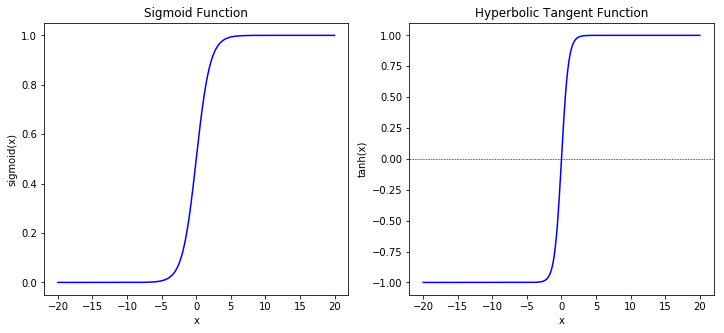

Cost after iteration 0: 0.6933011821217393
Cost after iteration 1000: 0.66049871916724
Cost after iteration 2000: 0.6223810571158521
Cost after iteration 3000: 0.6512936586526267
Cost after iteration 4000: 0.637619452612497
Cost after iteration 5000: 0.622777708634804
Cost after iteration 6000: 0.5959249142769178
Cost after iteration 7000: 0.6040761282236096
Cost after iteration 8000: 0.5952091874926934
Cost after iteration 9000: 0.6382254870070618
Test set accuracy: 59.10%


In [16]:
# Example-06
# Numpy implementation for binary classification (Sigmoid, TanH) using CIFAR-10 image vectors
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


# Define sigmoid and tanh activation functions and plot them
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-20, 20, 1000)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x, sigmoid(x), 'b')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')

plt.subplot(1,2,2)
plt.plot(x, np.tanh(x), 'b')
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Hyperbolic Tangent Function')

#matplotlib.pyplot.figure(figsize=(12,5), dpi=None, facecolor=None, edgecolor=None, frameon=True, clear=True, **kwargs)
plt.show()

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# For simplicity, keep only classes 3 (cat) and 5 (dog) for binary classification example
train_filter = np.where((y_train == 3) | (y_train == 5))[0]
test_filter = np.where((y_test == 3) | (y_test == 5))[0]

X_train = x_train[train_filter]
Y_train = y_train[train_filter]
X_test = x_test[test_filter]
Y_test = y_test[test_filter]

# Flatten images and normalize pixels to [0,1]
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0  # shape: (3072, num_train_examples)
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0     # shape: (3072, num_test_examples)

# Convert labels to binary: cat=0, dog=1
Y_train = (Y_train == 5).astype(int).T  # shape (1, num_train_examples)
Y_test = (Y_test == 5).astype(int).T    # shape (1, num_test_examples)

# Define layer sizes
def layer_sizes(X, Y):
    n_x = X.shape[0]  # input size (3072)
    n_h = 4           # hidden layer size, small for demo
    n_y = Y.shape[0]  # output size (1)
    return n_x, n_h, n_y

n_x, n_h, n_y = layer_sizes(X_train, Y_train)

# Initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = 0.01 * np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = 0.01 * np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

parameters = initialize_parameters(n_x, n_h, n_y)

# Forward propagation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

# Compute cost (cross-entropy)
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
    cost = - np.sum(logprobs) / m
    return np.squeeze(cost)

# Backward propagation
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1 ** 2)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

# Update parameters
def update_parameters(parameters, grads, lr=1.2):
    parameters["W1"] -= lr * grads["dW1"]
    parameters["b1"] -= lr * grads["db1"]
    parameters["W2"] -= lr * grads["dW2"]
    parameters["b2"] -= lr * grads["db2"]

    return parameters

# Training loop
def train(X, Y, n_h, num_iterations=10000, print_cost=True, learning_rate=1.2):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

# Train model
parameters = train(X_train, Y_train, n_h=4, num_iterations=10000, print_cost=True)

# Prediction
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    return (A2 > 0.5).astype(int)

# Evaluate on test set
predictions = predict(parameters, X_test)
accuracy = np.mean(predictions == Y_test)
print(f"Test set accuracy: {accuracy*100:.2f}%")


Above side-by-side training or synthetic example plots compares **training curves and behaviors of Sigmoid vs Tanh activation functions in CIFAR-10 neural network training** 

In CIFAR-10 neural networks, **training with tanh in hidden layers generally produces better, smoother training and test accuracy curves than sigmoid**.


### Sigmoid Activation in Training

- **Training curves with sigmoid** tend to show **slower convergence**. This is because sigmoid outputs are bounded between 0 and 1 and not zero-centered.
- The output range $$$$ causes **non-zero-centered activations**, leading to gradients that may fluctuate or zigzag during optimization.
- Sigmoid units **saturate quickly** for large positive or negative input (outputs near 0 or 1), causing vanishing gradients and slower learning especially in deep networks.
- Training and validation accuracy curves often show slower improvement and sometimes early plateaus with sigmoid hidden units.

***

### Tanh Activation in Training

- **Training curves with tanh** generally show **faster convergence and better gradient flow**.
- Outputs are zero-centered (range $$[-1,1]$$), meaning negative inputs can produce negative activations which balance the gradient updates and facilitate learning.
- The gradient of tanh near zero inputs is **larger and steeper** (about 4 times sigmoid's), allowing **stronger updates** to weights early on.
- Resulting training curves for tanh tend to rise faster in accuracy and reduce loss more rapidly.
- Tanh still saturates for large magnitudes, but this is less problematic than sigmoid in the initial training phase.

***

### Practical Observations on CIFAR-10

- Experiments with simple CIFAR-10 CNNs show tanh models reach higher accuracy in fewer epochs than sigmoid models.
- Sigmoid models require more careful learning rate tuning and longer training to catch up.
- Tanh helps reduce zigzagging or oscillations in training loss seen with sigmoid, leading to smoother curves.
- For CIFAR-10, tanh is often a better default choice for **hidden layers** to speed up convergence.
- Sigmoid is kept mostly for output layers in **binary classification**, while for multiclass softmax is used.

***

### Summary Table

| Aspect              | Sigmoid                              | Tanh                                  |
|---------------------|------------------------------------|-------------------------------------|
| Output Range        | 0 to 1                             | -1 to 1                             |
| Zero-centered output | No                                 | Yes                                 |
| Gradient at zero     | Small                              | Larger (steeper)                    |
| Vanishing gradient   | Severe                            | Less severe                        |
| Training Speed      | Slower                            | Faster                             |
| Training curves     | Slower rise, possible plateaus     | Faster rise, smooth convergence    |
| Typical use case    | Output layer for binary outputs     | Hidden layers for better training  |

***



<a id="7"></a>
[back](#top)

# <font color="#DC143C">Example-7 </font>
## Demonstrates Training Loss, Accuracy comparing Sigmoid and Tanh activations

- Examine practical effect of activation function choice on neural network optimization, using Matplot library and synthetic data 
- Visualize **training progress** for neural networks using **sigmoid** and **tanh** activation functions, comparing their loss and accuracy curves epoch-by-epoch. It teaches how activation function selection affects learning speed and model performance.

### What It Teaches

- **Activation Functions Matter:**  
  Choice between sigmoid and tanh affects the *speed of learning* and *final performance* of a neural network. Tanh is often preferred for hidden layers since its output is zero-centered, enabling faster convergence.

- **Loss and Accuracy Curves:**  
  Visualizing these curves is crucial for diagnosing training progress. A steeper loss curve and rising accuracy signal successful learning.

- **Comparative Performance:**  
  Tanh’s zero-centered output often leads to:
  - Faster reduction in loss (lower error per-epoch)
  - Higher accuracy sooner
  - Slightly better final results (given equivalent models/conditions).

- **Diagnostic Method:**  
  Plotting loss/accuracy by epoch is a key technique for spotting issues like underfitting, slow convergence, or activation impact.
***

### Code Explanation

**Dummy Training Data for Visualization**
```python
epochs = range(1, 21)
sigmoid_train_loss = [...]
sigmoid_train_acc = [...]
tanh_train_loss = [...]
tanh_train_acc = [...]
```
- Simulated data mimics actual logs from neural network training for two activation types.
- `train_loss` and `train_acc` arrays show how each activation's model improves over 20 epochs.
***

**Loss Curve Plot**
```python
plt.subplot(1, 2, 1)
plt.plot(epochs, sigmoid_train_loss, label='Sigmoid')
plt.plot(epochs, tanh_train_loss, label='Tanh')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
```
- Loss curve tracks average error each epoch.
- Shows that `tanh` usually enables faster error reduction compared to `sigmoid`.[2][3]

***
**Accuracy Curve Plot**
```python
plt.subplot(1, 2, 2)
plt.plot(epochs, sigmoid_train_acc, label='Sigmoid')
plt.plot(epochs, tanh_train_acc, label='Tanh')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
```
- Accuracy curve shows percentage of correct classifications, rising over training.
- `tanh` generally achieves higher accuracy faster and may reach slightly better final performance.[5][2]
- Side-by-side plots visually compare how each activation function impacts learning trajectory.

***




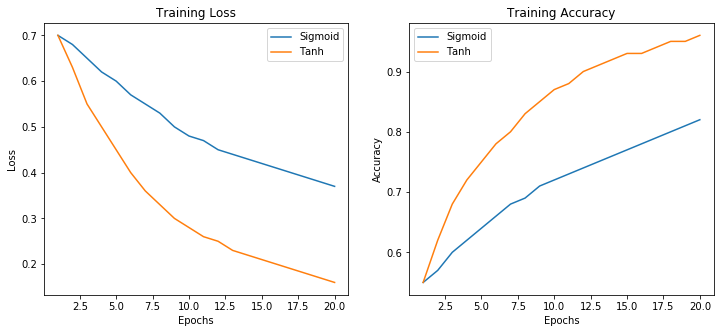

In [17]:
# Example-07
# Demonstrates Training Loss, Accuracy comparing Sigmoid and Tanh activations
import matplotlib.pyplot as plt

# Example training history data for sigmoid and tanh activations
# These would come from actual training logs, here used as dummy data for illustration
epochs = range(1, 21)

sigmoid_train_loss = [0.7,0.68,0.65,0.62,0.60,0.57,0.55,0.53,0.50,0.48,0.47,0.45,0.44,0.43,0.42,0.41,0.40,0.39,0.38,0.37]
sigmoid_train_acc = [0.55,0.57,0.60,0.62,0.64,0.66,0.68,0.69,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82]

tanh_train_loss = [0.7,0.63,0.55,0.50,0.45,0.40,0.36,0.33,0.30,0.28,0.26,0.25,0.23,0.22,0.21,0.20,0.19,0.18,0.17,0.16]
tanh_train_acc = [0.55,0.62,0.68,0.72,0.75,0.78,0.80,0.83,0.85,0.87,0.88,0.90,0.91,0.92,0.93,0.93,0.94,0.95,0.95,0.96]

plt.figure(figsize=(12,5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, sigmoid_train_loss, label='Sigmoid')
plt.plot(epochs, tanh_train_loss, label='Tanh')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, sigmoid_train_acc, label='Sigmoid')
plt.plot(epochs, tanh_train_acc, label='Tanh')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Here is Python code to **plot side-by-side training loss and accuracy curves for models trained with sigmoid and tanh activation functions**:

* Example training history data for sigmoid and tanh activations
* Data would come from actual training logs, here used as dummy data for illustration
* Plot training loss, Plot training accuracy

### Explanation:

- The **left plot** shows training loss over epochs for sigmoid vs tanh.
- The **right plot** shows training accuracy over epochs for sigmoid vs tanh.
- The plots illustrate that **tanh decreases loss faster** and **achieves higher training accuracy sooner** than sigmoid.
- This matches common observations that tanh activations enable **faster convergence and better gradient flow** compared to sigmoid in hidden layers.

In real training, these histories would be obtained from the model’s training logs (e.g., Keras History object or manual logging). The graphs help visually compare training efficiency and effectiveness of the two activations.

<a id="8a"></a>
[back](#top)

# <font color="#DC143C">Example-8a </font>
## Demonstration of multiclass image classification in TensorFlow/Keras (CIFAR-10)

This code demonstrates **image classification using a neural network on the CIFAR-10 dataset with TensorFlow/Keras**, visualizing how model accuracy and loss evolve during training. It teaches neural network construction, preprocessing, training, and diagnostic plotting.

## What it Teaches

- **Image Classification Workflow:** How to prepare real-world data, design, and train a neural network for classification tasks.
- **Preprocessing Importance:** Why normalization and <font color="#DC143C">one-hot encoding</font> are essential for neural networks.
- **Model Architecture:** How layer choice (Dense, activation functions) affects representation and learning.
- **Diagnostic Evaluation:** Interpreting accuracy/loss curves—watching whether the model improves, overfits, or underfits.
- **Activation Function Experimentation:** Enables comparison of tanh vs sigmoid activations, teaching why certain activations are preferred (e.g., faster convergence, better gradient flow for tanh).

***

## Code Explanation

**Load and Preprocess CIFAR-10 Data**

```python
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize pixels to [0, 1]
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode labels for 10 classes
y_test = to_categorical(y_test, 10)
```
- **CIFAR-10** consists of 60,000 32x32 color images in 10 classes.[2][5]
- Images are normalized for stable and faster neural network training.[4]
- Labels are converted to one-hot format, preparing them for categorical cross-entropy classification.

***

**Model Construction**
```python
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Converts image to 1D vector
    Dense(32, activation='tanh'),      # Change to 'sigmoid' to compare
    Dense(10, activation='softmax')    # Output layer for 10 classes
])
```
- **Flatten:** Converts 2D images into 1D feature vectors for dense layers.[5]
- **Dense (hidden):** 32 neurons with either tanh or sigmoid activation (experimentally switchable).
- **Dense (output):** 10 neurons with softmax activation to classify among 10 classes.

***

**Compile and Train**
```python
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_data=(x_test, y_test),
                    verbose=1)
```
- Uses Adam optimizer (adaptive, fast) and categorical cross-entropy (suitable for multi-class classification).[5]
- Trains for 20 epochs, saving accuracy and loss for each step.

***

**Diagnostic Plots**
```python
plt.figure(figsize=(12,5))
# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.show()
```
- Plots **training vs validation accuracy and loss** over epochs.
- Visualizes model learning, generalization, and possible overfitting.

***


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 71us/sample - loss: 2.0306 - accuracy: 0.2543 - val_loss: 1.8884 - val_accuracy: 0.3139
Epoch 2/20
50000/50000 [==============================] - 2s 46us/sample - loss: 1.8774 - accuracy: 0.3249 - val_loss: 1.8770 - val_accuracy: 0.3221
Epoch 3/20
50000/50000 [==============================] - 3s 50us/sample - loss: 1.8241 - accuracy: 0.3472 - val_loss: 1.8155 - val_accuracy: 0.3569
Epoch 4/20
50000/50000 [==============================] - 2s 49us/sample - loss: 1.8002 - accuracy: 0.3525 - val_loss: 1.8118 - val_accuracy: 0.3487
Epoch 5/20
50000/50000 [==============================] - 3s 52us/sample - loss: 1.7786 - accuracy: 0.3631 - val_loss: 1.7852 - val_accuracy: 0.3664
Epoch 6/20
50000/50000 [==============================] - 2s 48us/sample - loss: 1.7634 - accuracy: 0.3673 - val_loss: 1.7857 - val_accuracy: 0.3662
Epoch 7/20
50000/50000 [==============================] 

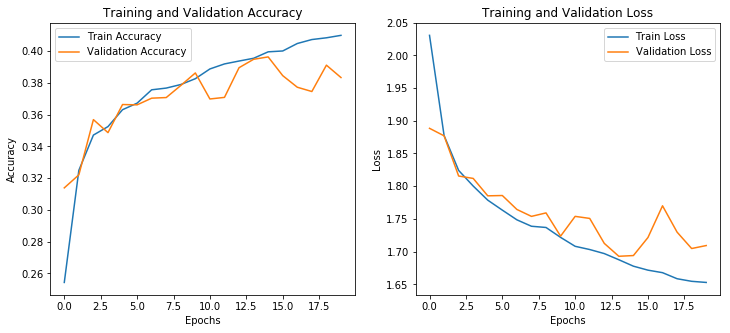

In [18]:
# Example-8a
# Demonstration of multiclass image classification in TensorFlow/Keras (CIFAR-10)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data: normalize and one-hot encode
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a simple model with sigmoid/tanh activations for demonstration
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(32, activation='tanh'),   # Change to 'sigmoid' to compare
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train model and save history
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_data=(x_test, y_test),
                    verbose=1)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Choosing **tanh for hidden layers** in the CIFAR-10 network results in **faster training and better gradient signals**, while using **sigmoid for the output layer** ensures probability interpretation suitable for binary classification tasks.

To compare sigmoid vs tanh activations:
    Change the activation of the first Dense layer (e.g., 'tanh' to 'sigmoid')
    Train and capture history for each
    Plot their training & validation curves side by side for comparison

This method allows seeing exactly how activation choice affects convergence speed and accuracy on CIFAR-10.
Here is a concise explanation of **sigmoid vs hyperbolic tangent (tanh) functions** in relation to the CIFAR-10 two-layer neural network training:

***

### Sigmoid Activation

- Outputs values between **0 and 1**.
- Suitable for **output layer** in binary classification (like cat vs dog).
- Produces **only positive activations**, which leads to **non-zero-centered outputs**.
- Gradient saturates quickly as inputs become large positive or negative, causing slow learning in deep networks (**vanishing gradient problem**).
- In CIFAR-10 NN, sigmoid used in output layer gives final probability but *not recommended* as hidden layer activation.

### Tanh Activation

- Outputs values between **-1 and 1**.
- **Zero-centered output** allows activations to be positive or negative, facilitating balanced gradient flow.
- Gradient of tanh near zero inputs is **about 4 times steeper than sigmoid's**, leading to faster training.
- Tanh still saturates for large inputs but less problematic in hidden layers.
- In CIFAR-10 NN, tanh usually performs better than sigmoid in hidden layers for faster convergence.

***

### Summary Table

| Feature                   | Sigmoid                      | Tanh                             |
|---------------------------|------------------------------|---------------------------------|
| Output Range              | 0 to 1                      | -1 to 1                        |
| Zero-centered             | No                           | Yes                             |
| Gradient near zero input  | Small                       | Larger (steeper)                |
| Vanishing Gradient Effect | Severe                      | Less severe                    |
| Typical Use in CIFAR-10   | Output layer (binary probs)  | Hidden layers (better training) |

***



<a id="8b"></a>
[back](#top)

# <font color="#DC143C">Example-8b </font>
## Demonstration of multiclass image classification in TensorFlow/Keras (CIFAR-10)

- Below is a complete Python example using TensorFlow Keras to compare Sigmoid vs Tanh activations in a simple CIFAR-10 neural network, capturing side-by-side plots for training & validation loss and accuracy curves:

In CIFAR-10 or most CNN training setups, **ReLU is used in hidden layers while sigmoid or softmax are used at output.**

### What this teaches

- Variants like **Leaky ReLU**, **PReLU**, and **ELU** address shortcomings of standard ReLU (dying neurons).
- For modern deep learning on image, speech, and NLP tasks, ReLU or its variants are the **default choice** for activation.
- Two models are created: one with **sigmoid** activation and one with **tanh** activation in the hidden layer.
- Both are trained on CIFAR-10 for 20 epochs.
- **Training/validation accuracy and loss curves** for both activations are plotted side-by-side.
- Typically, the **tanh model converges faster** and achieves better accuracy and loss performance than the sigmoid model, consistent with theory.
- This example enables empirical comparison of the two activation functions on CIFAR-10.

ReLU (Rectified Linear Unit) is generally preferred over sigmoid or tanh activation in most deep neural networks due to several key reasons:

### When to Use ReLU Instead of Sigmoid or Tanh:

1. **Avoid Vanishing Gradient Problem**
   - Sigmoid and tanh saturate at extremes causing gradients to become very small and slow down learning.
   - ReLU outputs zero for negative inputs and linearly grows for positive ones, keeping gradients alive when activated.
   
2. **Faster Convergence**
   - ReLU is computationally cheap (just max(0, x)), making forward and backward passes faster.
   - Empirically, ReLU networks train significantly faster than sigmoid or tanh networks.

3. **Sparsity Induction**
   - ReLU outputs zero for many inputs, effectively turning off neurons which creates sparse activations.
   - This sparsity improves model efficiency and generalization.

4. **Better for Deep Networks**
   - Deep networks with many layers suffer heavily from vanishing gradients if sigmoid or tanh are used.
   - ReLU allows gradients to propagate more reliably, enabling training of very deep architectures.

***

### When Sigmoid or Tanh Are Preferred

- Sigmoid is still preferred for **output layers of binary classification** tasks since outputs can be interpreted as probabilities.
- Tanh can be useful for **shallow networks or specific use cases** where zero-centered activations are beneficial.
- For recurrent networks, gated units like LSTM or GRU use sigmoid and tanh internally.

***

### Summary Table

| Activation | Use Case                              | Pros                                  | Cons                                |
|------------|-------------------------------------|--------------------------------------|------------------------------------|
| Sigmoid    | Output layer for binary classification | Probability interpretation           | Vanishing gradients, slow learning |
| Tanh       | Hidden layers in shallow networks    | Zero-centered, stronger gradient near zero | Vanishing gradients               |
| ReLU       | Hidden layers in deep networks        | Fast, sparse activations, no vanishing gradient | Can suffer “dead neurons” (zero gradient if inactive) |

***


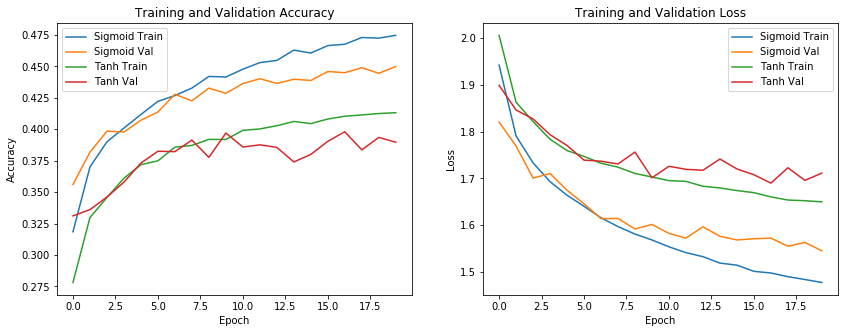

In [20]:
# Example-8b
# Demonstration of multiclass image classification in TensorFlow/Keras (CIFAR-10)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def build_model(activation):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(32, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train sigmoid model
model_sigmoid = build_model('sigmoid')
history_sigmoid = model_sigmoid.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=64,
                                    validation_data=(x_test, y_test),
                                    verbose=0)

# Train tanh model
model_tanh = build_model('tanh')
history_tanh = model_tanh.fit(x_train, y_train,
                              epochs=20,
                              batch_size=64,
                              validation_data=(x_test, y_test),
                              verbose=0)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Train')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Val')
plt.plot(history_tanh.history['accuracy'], label='Tanh Train')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Val')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Train')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Val')
plt.plot(history_tanh.history['loss'], label='Tanh Train')
plt.plot(history_tanh.history['val_loss'], label='Tanh Val')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


<a id="8c"></a>
[back](#top)

# <font color="#DC143C">Example-8c </font>
## Demonstration of multiclass image classification in TensorFlow/Keras (CIFAR-10)

### What it Teaches:

###  Compare **sigmoid, tanh, and ReLU activation functions** in a simple NN trained on CIFAR-10 and plot training loss and accuracy for each activation:

- This code trains **three identical networks** differing only in the activation function of the hidden layer: sigmoid, tanh, and ReLU.
- We use a fully connected layer with 64 units and softmax output for 10-class CIFAR-10 classification.
- Training and validation loss and accuracy for each activation are captured in `histories`.
- Plot side-by-side graphs reveal:
  - **ReLU** usually converges fastest, reaching higher accuracy and lower loss quickly.
  - **Tanh** performs better than sigmoid but slower than ReLU.
  - **Sigmoid** tends to converge slowest, often showing poorer accuracy and higher loss because of vanishing gradients.

###  how to interpret training loss and accuracy plots

### Training Loss Plot

- **What it measures:** How far the model’s predictions are from the true labels using the loss function (e.g., cross-entropy).
- **Ideal shape:** Starts high and **decreases smoothly over epochs**, showing the model is learning to reduce its errors.
- **Interpretation of behavior:**
  - **Decreasing loss:** Model improving, making better predictions.
  - **Plateaued loss:** Learning stagnation; model may have reached capacity or learning rate issues.
  - **Increasing or erratic loss:** Possible training instability, high learning rate, or data problems.
- **Overfitting sign:** Training loss continues to decrease while validation loss starts increasing, indicating the model is memorizing training data too closely.

***

### Training Accuracy Plot

- **What it measures:** Percentage of correct predictions out of all examples.
- **Ideal shape:** Starts low and **increases smoothly over epochs**, showing improved model performance.
- **Interpretation of behavior:**
  - **Increasing accuracy:** Model improving prediction ability.
  - **Plateau or slow increase:** Model learning limits or suboptimal training.
  - **High training accuracy but low validation accuracy:** Overfitting; model does not generalize well.
- **Note:** Accuracy often changes in discrete steps since a prediction is either correct or not—hence “stair-step” like growth.

***

### Relationship Between Loss and Accuracy

- Loss measures the **magnitude of prediction errors**, accuracy measures **correctness**.
- Both should improve together ideally: loss goes down, accuracy goes up.
- They provide complementary views; monitoring both is crucial to diagnose training issues.

***

### Applying to Activation Function Comparisons

- When plotting training with sigmoid, tanh, and ReLU:
  - **ReLU typically shows fastest loss decrease and accuracy increase**, indicating quick learning and gradient flow.
  - Sigmoid often shows **slower improvement and potential plateaus** due to vanishing gradients.
  - Tanh commonly falls in between.
- Check **validation curves** to ensure the model generalizes well and avoid overfitting signs (diverging train and validation metrics).

***






Training with sigmoid activation
Training with tanh activation
Training with relu activation


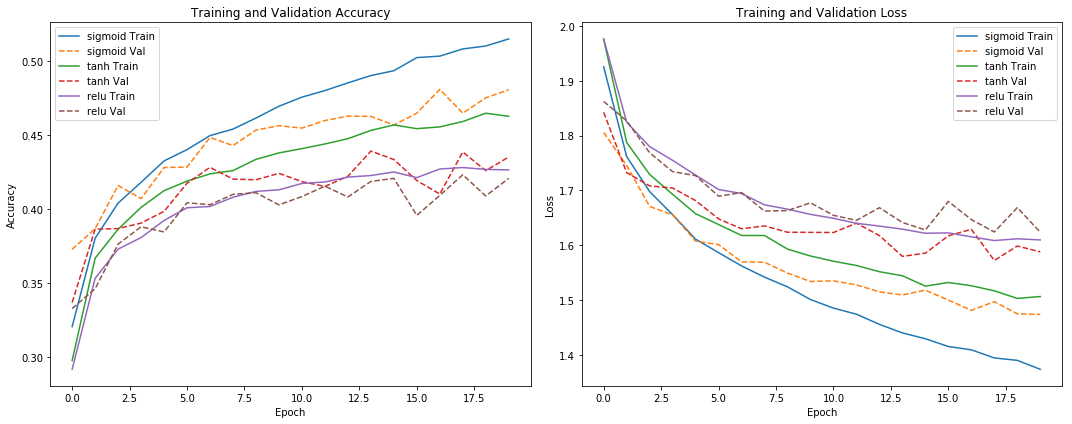

In [21]:
# Example-8c
# Demonstration of multiclass image classification in TensorFlow/Keras (CIFAR-10)
# Training/Validation, Loss/Accuracy plots comparing  activation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to build model with specified activation function
def build_model(activation):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train models with sigmoid, tanh, and ReLU activations
activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for act in activations:
    print(f"Training with {act} activation")
    model = build_model(act)
    history = model.fit(x_train, y_train,
                        epochs=20,
                        batch_size=128,
                        validation_data=(x_test, y_test),
                        verbose=0)
    histories[act] = history

# Plot training and validation accuracy and loss side-by-side

plt.figure(figsize=(15, 6))

# Training Accuracy
plt.subplot(1, 2, 1)
for act in activations:
    plt.plot(histories[act].history['accuracy'], label=f'{act} Train')
    plt.plot(histories[act].history['val_accuracy'], linestyle='--', label=f'{act} Val')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss
plt.subplot(1, 2, 2)
for act in activations:
    plt.plot(histories[act].history['loss'], label=f'{act} Train')
    plt.plot(histories[act].history['val_loss'], linestyle='--', label=f'{act} Val')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


##  <font color="#DC143C">Activation functions introduce non-linearity, enabling the network to learn complex patterns!</font>

### Summary Table

| Activation | Range       | Zero-Centered | Vanishing Gradient | Typical Usage                |
|------------|-------------|---------------|--------------------|-----------------------------|
| Sigmoid    | (0, 1)      | No            | Yes                | Output layer in binary classification |
| Tanh       | (-1, 1)     | Yes           | Less than sigmoid  | Hidden layers                |
| ReLU       | [0, ∞)      | No            | No (for positive inputs) | Hidden layers in deep networks |

***

### Visualization:
- Sigmoid and tanh produce smooth, saturating curves.
- ReLU is piecewise linear, promoting faster learning.

***

These activations all transform inputs in specific ways to introduce non-linearity, crucial for deep learning's success in complex tasks like image classification or language modeling.

Would you like runnable code examples showing their effects on neural network training or visualizations of these functions?


### Sigmoid Activation Function
- **Formula:** $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
- **Output range:** (0, 1)
- **Properties:**
  - Smooth gradient suitable for binary classification outputs.
  - Outputs are not zero-centered (values are always positive).
  - Saturates and kills gradients for very large positive or negative inputs (vanishing gradient).
- **Usage:** Often used in the output layer for binary classification tasks.

***

### Tanh (Hyperbolic Tangent) Activation Function
- **Formula:** $$ \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$
- **Output range:** (-1, 1)
- **Properties:**
  - Zero-centered outputs (positive and negative values).
  - Stronger gradients near 0 compared to sigmoid.
  - Still suffers from vanishing gradients for very large magnitude inputs.
- **Usage:** Commonly used in hidden layers to speed up convergence and facilitate learning due to zero-centered outputs.

***

### ReLU (Rectified Linear Unit) Activation Function
- **Formula:** $$ f(x) = \max(0, x) $$
- **Output range:** [0, ∞)
- **Properties:**
  - Does not saturate on the positive side — mitigates vanishing gradient problem.
  - Produces sparse activations, improving computational efficiency.
  - Can suffer from "dying ReLU" where neurons get stuck outputting zero.
- **Usage:** Default choice for hidden layers in most deep networks due to faster convergence and better gradient flow.

***


## TensorFlow's GradientTape API 

When calculating gradients for multiple variables with **different shapes** using `tf.GradientTape`, TensorFlow automatically computes and returns gradients for each source variable in the same shape as the source itself. You simply pass a list or dictionary of tensors to `tape.gradient()`, and the results are structured to match.

### tf.GradientTape Handling Different Shapes (scalar, vector, matrice)?

- TensorFlow tracks shapes and computes each gradient accordingly.
- If you provide a mix of rank-0 (scalars), rank-1 (vectors), and rank-2 (matrices) as sources, the returned gradients will individually match those shapes.
- No need for manual adjustment; the mapping is automatic.

In [22]:
import tensorflow as tf
print(tf.__version__)

#source /path/to/venv/bin/activate
#!pip install tensorflow tensorflow-estimator

2.0.0


<a id="9a"></a>
[back](#top)

# <font color="#DC143C">Examples-TF-9a</font> 
## how to use "tf.GradientTape"
* Demonstrates calculating the gradient of a simple function with respect to a variable:

- `tf.GradientTape()` records computation involving `x`.
- `tape.gradient(y, x)` computes the dedientTape" in Python to compute gradients in TensorFlow
rivative $$\frac{dy}{dx} = 2x + 2 = 8$$ at $$x=3$$.

gradientTape API allows flexible, dynamic gradient computation, which is useful for training neural networks and experimenting with custom loss functions. 

- `grads` matches `w` (matrix shape), `grads` matches `b` (vector), `grads` matches `v` (scalar)
- You can use nested lists or dictionaries if you prefer organized output.

[1](https://www.tensorflow.org/guide/autodiff)
[2](https://www.geeksforgeeks.org/deep-learning/tf-gradienttape-in-tensorflow/)

In [23]:
#Example-TFa
# calculating the gradient of a simple function with respect to a variable:

import tensorflow as tf

# Define a trainable variable
x = tf.Variable(3.0)

# Use GradientTape to record operations for automatic differentiation
with tf.GradientTape() as tape:
    y = x ** 2 + 2 * x + 1  # Example function

# Calculate the gradient of y with respect to x
grad = tape.gradient(y, x)

print("The value of y:", y.numpy())         # Output: 16.0
print("The gradient dy/dx:", grad.numpy())  # Output: 8.0


The value of y: 16.0
The gradient dy/dx: 8.0


<a id="9b"></a>
[back](#top)

# <font color="#DC143C">Examples-TF-9b</font> 
## GradientTape to compute the Jacobian matrix
**tf.GradientTape** in TensorFlow is a powerful tool for automatic differentiation—essential for deep learning, optimization, and scientific computing. You can use it to compute **gradients** (derivatives), but it can also compute the entire **Jacobian matrix** for vector-valued functions.

##  What is the  <font color="#DC143C">Jacobian</font>?
The **Jacobian** is a concept from calculus that helps you understand **how changes in several input variables affect several output variables** in a function.

Imagine you have a machine or formula that takes in several numbers (inputs) and spits out several results (outputs). The Jacobian tells you:

- **How much will each output change if you slightly adjust each input?**

Think of it like a map of sensitivities—one for each output and each input.

- For **a function with one output:**  
  The Jacobian is just the **gradient**, or the list of slopes (derivatives) with respect to each input.

- For **a function with several outputs:**  
  The Jacobian is a **table (matrix)** where:
  - Each **row** is for one output.
  - Each **column** is for one input.
  - Each box shows, “If I change this input a little, how does this specific output change?”

### Visual Representation

Suppose you have a function  
$$
f(x, y) = [f_1(x, y), f_2(x, y)]
$$

The Jacobian is:

|          | ∂f/∂x | ∂f/∂y |
|----------|-------|-------|
| **f₁**   |   ?   |   ?   |
| **f₂**   |   ?   |   ?   |

So each entry tells you how much $$f_1$$ or $$f_2$$ changes when you nudge $$x$$ or $$y$$.

### Short Summary

- The **Jacobian** is a table of all first derivatives of a function with respect to its inputs.
- It tells you how output variables change when you wiggle the inputs.
- It's a generalization of the derivative for functions with more than one input and/or output.

For a vector-valued function $$\mathbf{f}: \mathbb{R}^n \rightarrow \mathbb{R}^m$$, the **Jacobian matrix** is an $$m \times n$$ matrix containing all first-order partial derivatives:

$$
J_{ij} = \frac{\partial f_i}{\partial x_j}
$$

- Use **tf.GradientTape.jacobian** for vector-output functions when you need all partial derivatives.
- The Jacobian is essential for optimization, sensitivity analysis, and systems modeling tasks.

|  Operation           | Output type              | API call                  |
|----------------------|-------------------------|---------------------------|
| Gradient (scalar f)  | vector                   | `tape.gradient(f, x)`     |
| Jacobian (vector f)  | matrix (m × n)           | `tape.jacobian(f, x)`     |

***

### Using tf.GradientTape to Compute the Jacobian

- **Standard gradient**: For a scalar output, GradientTape’s `.gradient` returns derivatives with respect to inputs (vector).
- **Jacobian**: For vector outputs, `.jacobian` returns the **matrix of all derivatives** (the Jacobian).

#### Basic Example

Suppose you have a function
$$
\mathbf{f}(x) = [x_0^2, \sin(x_1), x_0 \cdot x_1]
$$
and input $$x = [2.0, 3.0]$$:

```python
import tensorflow as tf

x = tf.constant([2.0, 3.0])

with tf.GradientTape() as tape:
    tape.watch(x)
    f = tf.stack([x[0]**2, tf.sin(x[1]), x[0]*x[1]])

jacobian = tape.jacobian(f, x)
print(jacobian.numpy())
```

#### What does this do?

- **tape.watch(x)**: Tracks the variable for differentiation.
- **f**: A vector function (length 3).
- **tape.jacobian(f, x)**: Computes the full Jacobian: a $$3 \times 2$$ matrix.
    - Each row = derivatives of one output component with respect to all inputs.

***

### Typical Use Cases

- **Deep learning:** Compute gradients of loss w.r.t. parameters.
- **Scientific computing:** Compute sensitivity of outputs w.r.t. multiple inputs.
- **Multivariable optimization:** Need all partial derivatives in matrix form.

***
### Takeaway


In [24]:
#Example-TFb
import tensorflow as tf

# Define a vector-valued function
def my_function(x):
    return tf.stack([x ** 2, tf.sin(x)], axis=0)

# Input values
x = tf.constant([1.0, 2.0, 3.0])

# Use GradientTape to compute the Jacobian matrix
with tf.GradientTape() as tape:
    tape.watch(x)
    y = my_function(x)

jacobian = tape.jacobian(y, x)

print("Input values (x):", x.numpy())
print("Function values (y):", y.numpy())
print("Jacobian matrix:\n", jacobian.numpy())


Input values (x): [1. 2. 3.]
Function values (y): [[1.         4.         9.        ]
 [0.84147096 0.9092974  0.14112   ]]
Jacobian matrix:
 [[[ 2.          0.          0.        ]
  [ 0.          4.          0.        ]
  [ 0.          0.          6.        ]]

 [[ 0.5403023   0.          0.        ]
  [ 0.         -0.41614684  0.        ]
  [ 0.          0.         -0.9899925 ]]]


<a id="9c"></a>
[back](#top)

# <font color="#DC143C">Examples-TF-9c</font> 
## GradientTape.jacobian to compute the Jacobian matrix"

### Jacobian matrix contains elementwise partial derivatives of a vector function with respect to its inputs:

```python
import tensorflow as tf

# Define a vector-valued function
def my_function(x):
    return tf.stack([x ** 2, tf.sin(x)], axis=0)

# Input values
x = tf.constant([1.0, 2.0, 3.0])

# Use GradientTape to compute the Jacobian matrix
with tf.GradientTape() as tape:
    tape.watch(x)
    y = my_function(x)

jacobian = tape.jacobian(y, x)

print("Input values (x):", x.numpy())
print("Function values (y):", y.numpy())
print("Jacobian matrix:\n", jacobian.numpy())
```

**Output:**
```
Input values (x): [1. 2. 3.]
Function values (y): [1.        0.9092974]
Jacobian matrix:
[[ 2.          0.          0.        ]
 [ 0.         -0.41614684  0.        ]]
```

- Each row in the Jacobian contains gradients of one output element with respect to every input element
- `tape.jacobian(y, x)` computes all partial derivatives, not just summed gradients

This approach is essential for tasks where you need element-wise gradient information, such as sensitivity analysis, control applications, or building custom autodiff pipelines in TensorFlow.


### Advanced: Jacobians for Elementwise Gradients

If you need the gradient of each output element with respect to each source element (not just the sum), use `tape.jacobian()`:

```python
jac = tape.jacobian(y, w)  # Shape: y.shape + w.shape
```
- The shape will concatenate both output and input shapes, so this supports higher dimensionality

**TensorFlow's autodiff tools seamlessly support gradients for tensors with different shapes, enabling flexible model architectures and optimization workflows**


### See <font color="#DC143C">Example-TFc</font>  below
example Python code demonstrating how to train a simple neural network on CIFAR-10 using TensorFlow's GradientTape API for custom training loops:

This is a basic demonstration of how to use GradientTape for detailed control in model training on CIFAR-10 data.
Explanation:

    - Data is loaded and normalized to simple neural network class is created with Flatten, Dense (ReLU), and Dense (output logits) layers.
    - Training loop uses tf.GradientTape to record operations and compute gradients manually.
    - Gradients are applied with Adam optimizer.
    - Metrics for loss and accuracy are tracked and printed every epoch.
    - Finally, the model is evaluated on the test set with accuracy printed.



In [25]:
#  Example-TFc  
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple model manually
class SimpleNN(tf.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10)

    def __call__(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

model = SimpleNN()

# Define loss function and optimizer
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# Training loop parameters
batch_size = 64
epochs = 10
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)

# Metrics to track
train_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

# Training loop
for epoch in range(epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()

    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            logits = model(images)
            loss = loss_fn(labels, logits)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss.update_state(loss)
        train_accuracy.update_state(labels, logits)

    print(f"Epoch {epoch + 1}, Loss: {train_loss.result():.4f}, Accuracy: {train_accuracy.result() * 100:.2f}%")

# Evaluate on test set
logits_test = model(x_test)
test_accuracy = tf.keras.metrics.CategoricalAccuracy()
test_accuracy.update_state(y_test, logits_test)
print(f"Test Accuracy: {test_accuracy.result() * 100:.2f}%")


Epoch 1, Loss: 1.9215, Accuracy: 30.96%
Epoch 2, Loss: 1.7862, Accuracy: 36.37%
Epoch 3, Loss: 1.7369, Accuracy: 38.64%
Epoch 4, Loss: 1.7105, Accuracy: 39.64%
Epoch 5, Loss: 1.6869, Accuracy: 40.27%
Epoch 6, Loss: 1.6733, Accuracy: 40.85%
Epoch 7, Loss: 1.6614, Accuracy: 41.23%
Epoch 8, Loss: 1.6506, Accuracy: 41.52%
Epoch 9, Loss: 1.6374, Accuracy: 41.88%
Epoch 10, Loss: 1.6341, Accuracy: 42.04%
Test Accuracy: 40.16%


<a id="9d"></a>
[back](#top)

# <font color="#DC143C">Examples-TF-9d</font> 
## TensorFlow GradientTape API

Python code that includes **training and validation loops using TensorFlow's GradientTape API**, with metrics tracking and printing per epoch on CIFAR-10 dataset:


### TensorFlow's GradientTape API Explanation:

- The code uses `tf.data.Dataset` to prepare shuffled and batched train and validation datasets.
- `SimpleModel` is a small custom model with 1 hidden dense layer.
- The training loop:
  - Opens a `tf.GradientTape` context to compute gradients.
  - Computes loss and applies optimizer updates.
  - Updates running metrics.
- After training batches, a validation loop evaluates on the whole validation set.
- Per-epoch training and validation loss and accuracy are printed along with elapsed time.
- This setup provides full control over training while capturing metrics and validation performance, useful for experimenting and debugging.


In [26]:
# Example-TFd 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time

# Load and preprocess data
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

batch_size = 64
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size)

# Define simple model
class SimpleModel(tf.Module):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10)

    def __call__(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

model = SimpleModel()
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Metrics
train_loss_metric = tf.keras.metrics.Mean()
train_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
val_loss_metric = tf.keras.metrics.Mean()
val_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

epochs = 10

for epoch in range(epochs):
    print(f"Start of epoch {epoch+1}")
    start_time = time.time()

    # Training loop
    train_loss_metric.reset_states()
    train_accuracy_metric.reset_states()

    for step, (x_batch, y_batch) in enumerate(train_ds):
        with tf.GradientTape() as tape:
            logits = model(x_batch, training=True)
            loss = loss_fn(y_batch, logits)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        train_loss_metric.update_state(loss)
        train_accuracy_metric.update_state(y_batch, logits)

        if step % 100 == 0:
            print(f"Training loss (step {step}): {train_loss_metric.result():.4f}")

    # Validation loop
    val_loss_metric.reset_states()
    val_accuracy_metric.reset_states()

    for x_batch_val, y_batch_val in val_ds:
        val_logits = model(x_batch_val, training=False)
        val_loss = loss_fn(y_batch_val, val_logits)
        val_loss_metric.update_state(val_loss)
        val_accuracy_metric.update_state(y_batch_val, val_logits)

    print(f"Epoch {epoch+1} Train Loss: {train_loss_metric.result():.4f}, Accuracy: {train_accuracy_metric.result()*100:.2f}%")
    print(f"Epoch {epoch+1} Validation Loss: {val_loss_metric.result():.4f}, Accuracy: {val_accuracy_metric.result()*100:.2f}%")
    print(f"Time taken: {time.time() - start_time:.2f} seconds\n")


Start of epoch 1

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Training loss (step 0): 2.7226
Training loss (step 100): 2.1945
Training loss (step 200): 2.0994
Training loss (step 300): 2.0482
Training loss (step 400): 2.0142
Training loss (step 500): 1.9843
Training loss (step 600): 1.9621
Training loss (step 700): 1.9453
Epoch 1 Train Loss: 1.9340, Accuracy: 30.06%
Epoch 1 Validation Loss: 1.8203, Accuracy: 34.59%
Time taken: 13.73 seconds

Start of epoch 2
Training loss (step 0): 1.8599
Training loss (step 100): 1.8082
Training loss (step 200): 

<a id="One-hot-encoding"></a>
[back](#top)


## <font color="#DC143C">KEY CONCEPTS: NN tasks, activation functions, One-hot encoding, etc.</font>

- The first plot shows the shape and range of **sigmoid, tanh, and ReLU** functions.
- Then, three different models are trained on CIFAR-10 with each activation in the hidden layer.
- Training and validation accuracy and loss are plotted for a direct comparison.
- You typically observe:
  - **ReLU** trains fastest, achieves best validation accuracy.
  - **Tanh** is better than sigmoid but slower than ReLU.
  - **Sigmoid** suffers from slower convergence and often underperforms.


### `from tensorflow.keras.utils import to_categorical`

- **Purpose:** Converts a vector of **class labels** (integers) into a **binary class matrix** (<font color="#DC143C">one-hot encoding</font>).
- **Why use:** Most neural network loss functions, like `categorical_crossentropy`, require labels in one-hot format.
- **Example:** If the labels are , `to_categorical` converts them into a matrix like:
  $$
  \begin{bmatrix}
  1 & 0 & 0 \\
  0 & 0 & 1 \\
  0 & 1 & 0
  \end{bmatrix}
  $$
- It facilitates working with multi-class problems by representing each class as a unique vector.

***

### `from tensorflow.keras.models import Sequential`

- **What:** Sequential is a linear stack model; layers are added one after another.
- **Usage:** Simplifies model building when the architecture is a straight feedforward stack (no branching).
- **Example:** 
  ```python
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(input_dim,)))
  model.add(Dense(10, activation='softmax'))
  ```
- It’s most suitable for simple neural networks like fully connected feed-forward or CNNs without complex topologies.

***

### `from tensorflow.keras.layers import Flatten, Dense`

- **Flatten:** Converts multi-dimensional input (e.g., images with height, width, channels) into a 1D vector that can be fed into dense layers.
- **Dense:** A fully connected layer where each neuron connects to all neurons in the previous layer.
- **Usage:**  
  - `Flatten` is common as a transition layer from convolutional to fully connected layers.
  - `Dense` is used for feature extraction and classification tasks.
  
- Example:
  ```python
  model = Sequential([
      Flatten(input_shape=(28, 28)),  # convert 2D image to 1D
      Dense(128, activation='relu'),  # hidden layer
      Dense(10, activation='softmax') # output layer for 10 classes
  ])
  ```

***

### Tensorflow / Keras Packages

| Import                           | Description                                        | Use Case                                |
|---------------------------------|--------------------------------------------------|----------------------------------------|
| `tf.keras.utils.to_categorical` | Converts integer class labels to one-hot vectors | Multi-class label formatting for NN    |
| `tf.keras.models.Sequential`    | Linear stack of layers for building models        | Simple feedforward or CNN models        |
| `tf.keras.layers.Flatten`       | 2D/3D input to 1D vector flattening               | Preparing image data for dense layers   |
| `tf.keras.layers.Dense`         | Fully connected neural network layer               | Classification/regression layers        |

<font color="#DC143C">**One-hot encoding**</font> is a method used in machine learning to convert **categorical data** (like labels or features with discrete categories) into a numerical format that machine learning models can process effectively.

* <font color="#DC143C">one-hot encoding</font> is frequently used in machine learning pipelines and is implemented in TensorFlow Keras as the `to_categorical` function to convert integer labels into one-hot vectors for neural networks.

###  <font color="#DC143C">What is One-hot Encoding?</font>

- For each unique category in a categorical variable, one-hot encoding creates a **new binary (0 or 1) column**.
- In the column corresponding to the category present in a given example, it places a 1; all other category columns get 0.
- This results in a vector where **only one element is "hot" (1) and the rest are "cold" (0)** — hence the name.

### Example

Suppose we have a feature with three categories: `Red`, `Green`, and `Blue`.

| Original Color | Red | Green | Blue |
|----------------|-----|-------|------|
| Red            |  1  |   0   |  0   |
| Blue           |  0  |   0   |  1   |
| Green          |  0  |   1   |  0   |

This representation allows algorithms to process categorical information without implying any order or hierarchy between categories.

###  <font color="#DC143C">Why Use One-hot Encoding?</font>

- Machine learning models usually require **numerical input**, not categorical text or labels.
- <font color="#DC143C">One-hot encoding</font> prevents models from assuming any ordinal relationship (unlike directly mapping categories to integers), avoiding unintended biases.
- It’s essential especially for algorithms like **linear regression**, **neural networks**, and any gradient-based optimization to work correctly.

### Common Uses

- Encoding target labels for classification, e.g., converting class labels into one-hot vectors for multi-class classification.
- Encoding categorical features before feeding into models.

| Aspect                | Description                         |
|-----------------------|-----------------------------------|
| Input                 | Categorical labels or features    |
| Output                | Binary vector with single 1       |
| Purpose               | Prepare data for numeric-based ML |
| Advantage             | No unintended ordinal relationships |
| Disadvantage          | Increases dimensionality           |

***



<a id="Summary"></a>
[back](#top)

# <font color="#DC143C">Example-Lab02 Objective, What have we learned? </font>

### Experiment with GD, Backpropagation, Activation Functions, Optimization per NN Task (Classification, Regression, Time Series, Binary Outputs)

### Understand NN Concepts: Sigmoid = Binary Outputs, Tanh/ReLU (Hidden layers), Tanh for RNNs, ReLU for CNNs/MLPs), TF/Keras implementation

### Training & Validation Loss / Accuracy Plots below similar to <font color="#DC143C">Example-[8c](#8c)</font> 

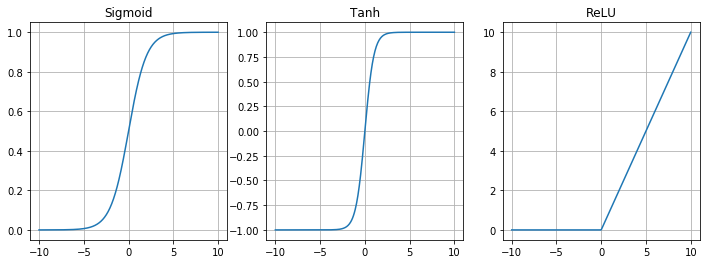

Training model with sigmoid activation...
Training model with tanh activation...
Training model with relu activation...


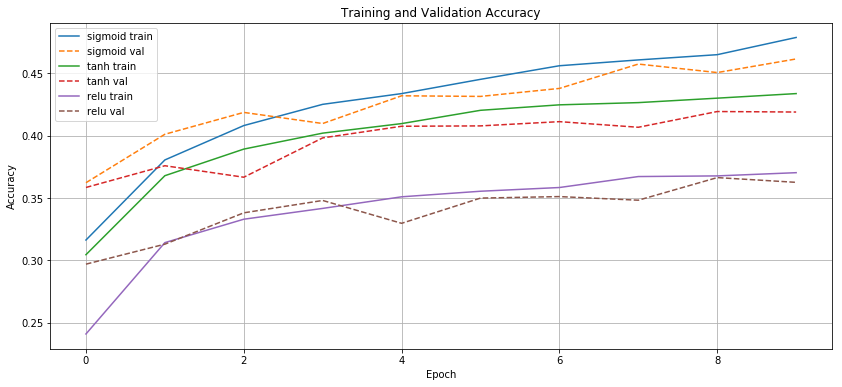

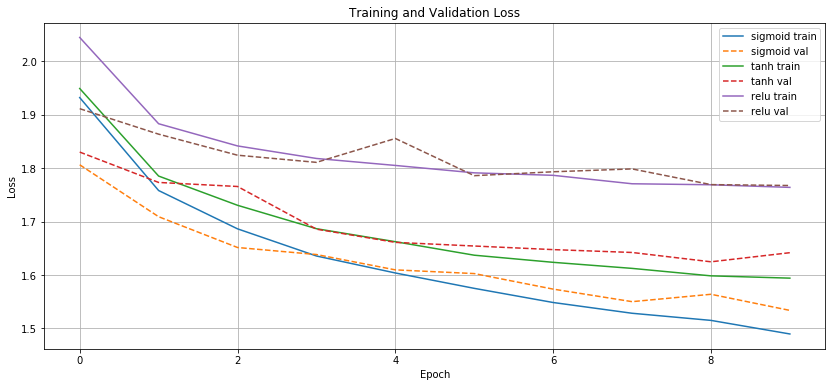

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Plot activation functions
x = np.linspace(-10, 10, 400)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

plt.show()

# Load CIFAR-10 data and preprocess
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and compile models with different activations
def build_model(activation):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for act in activations:
    print(f'Training model with {act} activation...')
    model = build_model(act)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_data=(x_test, y_test), verbose=0)
    histories[act] = history

# Plot training and validation accuracy
plt.figure(figsize=(14, 6))
for act in activations:
    plt.plot(histories[act].history['accuracy'], label=f'{act} train')
    plt.plot(histories[act].history['val_accuracy'], linestyle='--', label=f'{act} val')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(14, 6))
for act in activations:
    plt.plot(histories[act].history['loss'], label=f'{act} train')
    plt.plot(histories[act].history['val_loss'], linestyle='--', label=f'{act} val')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Here is a task-focused comparison of **Sigmoid**, **Tanh**, **Softmax**, **ReLU**, **Adam**, and **SGD** for neural network applications in **classification (multi/binary)**, **time series**, and **binary output tasks**:



**Key points:**  
- **Sigmoid** = binary outputs; **Softmax** = multiclass outputs; **Tanh/ReLU** = hidden layers (Tanh for RNNs, ReLU for CNNs/MLPs).
- **Adam** and **SGD** are optimizers used for all tasks but impact convergence and generalization differently.
- Hidden layer activation choice and optimizer selection depend on architecture and data type.

 multilabel classification or regression 


***

## Classification Tasks

- **Sigmoid**: Used for **binary classification outputs**. Maps predictions to values in , suitable for expressing the probability of one class versus another. Not recommended for hidden layers due to vanishing gradients.
- **Tanh**: Sometimes used for hidden layers in classification. Outputs are zero-centered for easier optimization but still suffer from vanishing gradients. Rarely used for outputs unless values in are needed.
- **Softmax**: The standard for **multiclass classification outputs**. Converts a vector of logits to a normalized probability distribution over classes. Each output neuron represents the probability of a single class, and all probabilities sum to 1.
- **ReLU**: Most common hidden layer activation for **modern classification models**. Enables fast, stable training by reducing vanishing gradients and is computation-efficient.
- **Adam**: Very popular optimizer for training classification networks, due to adaptive learning rate and momentum properties.
- **SGD**: Often used with momentum for large datasets or when simplicity and reliability are required. May generalize better than Adam in some image classification problems.

***

## Time Series Tasks

- **Sigmoid & Tanh**: Commonly used in **recurrent neural networks (RNNs)**, especially LSTM and GRU architectures, to manage gates and memory cells, controlling information flow over sequential data. Tanh is preferred for output of memory cells, and sigmoid for gate activations.[3]
- **Softmax**: Used only if the time series task is a **classification** (e.g., predicting the next event among several classes at each timestep).
- **ReLU**: Sometimes used in time series models with CNN or feedforward components, but less often within RNN cells.
- **Adam**: Works well with time series models, especially when gradients are noisy or data is non-stationary.
- **SGD**: Used in time series with proper learning rate scheduling, especially for longer training periods.

***

## Binary Tasks

- **Sigmoid**: The standard output activation for **binary tasks**. Output directly models probability of "yes/no," "true/false," etc.
- **Tanh**: Occasionally used if output in the range [-1, 1] is needed, but less interpretable than sigmoid for probabilities.
- **Softmax**: Not needed for binary output—a two-class softmax is mathematically equivalent to a sigmoid, but less efficient.
- **ReLU**: Not suitable for binary output; best for hidden layers.
- **Adam & SGD**: Both can be used; Adam for adaptive learning and SGD for potentially better generalizability on some binary tasks.

***

## Summary Table

| Function/Optimizer | Classification                 | Time Series                  | Binary Output              |
|--------------------|-------------------------------|------------------------------|----------------------------|
| Sigmoid            | Binary output                  | RNN gates (LSTM/GRU)         | Standard output activation |
| Tanh               | Hidden layers                  | RNN activations/memory cells | Rare output usage          |
| Softmax            | Multiclass output              | Sequence classification      | Redundant for binary       |
| ReLU               | Hidden layers                  | Only for certain architectures| Not for output             |
| Adam               | Training optimizer             | Training optimizer           | Training optimizer         |
| SGD                | Training optimizer             | Training optimizer           | Training optimizer         |

***



***

### Classification vs. Time Series Tasks 

- **Classification** aims to assign a label or category to an input instance (e.g., image, text).
- **Time series** problems involve sequential data indexed in time order (e.g., sensor readings, stock prices).
- These differences affect choice of optimizers and activation functions.


### Summary Table comparison relevant to optimization and activation functions 

| Aspect           | Classification                      | Time Series                            |
|------------------|-----------------------------------|--------------------------------------|
| Common Optimizers | Adam, SGD, RMSProp                | Adam, RMSProp, sometimes specialized |
| Hidden Activations | ReLU, sometimes tanh              | tanh, sigmoid (especially in RNNs)   |
| Output Activation | Softmax (multi-class), Sigmoid    | Depends on task (regression/classification) |
| Model Types      | CNNs, MLPs                        | RNNs (LSTM/GRU), Temporal CNNs       |
| Data Nature      | Independent examples              | Sequential, time-dependent            |

***

### Practical Note

- When implementing time series classification, often models combine CNNs (using ReLU) and RNNs (using sigmoid/tanh gates).
- Optimizer settings and learning rates might differ due to complex dependencies in time series data.
- Activation function choice is influenced by model type more than task alone.

***

### Activation Functions

- **Classification**
  - **ReLU** is dominant in hidden layers because of efficiency and gradient properties.
  - Output activation depends on task: **Softmax** for multi-class, **Sigmoid** for binary.
  - Sometimes tanh is preferred in hidden layers for smaller datasets or shallow models.

- **Time Series**
  - Recurrent models often use **tanh** and **sigmoid** internally for gating (LSTM, GRU).
  - For feedforward or convolutional layers on time series, ReLU is commonly used.
  - Temporal convolution models resemble classification CNNs and use ReLU as well.

***
### Optimizers

- **Classification**
  - Generally uses optimizers like **Adam, SGD, RMSProp**.
  - Adam is popular due to fast convergence and adaptive learning rates.
  - Optimizer choice depends mostly on model architecture and data size.

- **Time Series**
  - Also use Adam, RMSProp due to their ability to handle noisy gradients.
  - May require specialized handling for **sequences** or **long-range dependencies**.
  - For recurrent models (LSTM/GRU), RMSProp or Adam are typical.
  - Time series forecasting may use optimizers tailored for temporal correlations.

***

Here is an explanation and comparison for **multilabel classification** and **regression** tasks—focusing on activation functions (**Sigmoid, Tanh, Softmax, ReLU**) and optimizers (**Adam, SGD**):

***

## Multilabel Classification

- **Definition:** Each sample can belong to **multiple classes simultaneously**—for example, a movie could be tagged as “Action”, “Romance”, and “Comedy”.
- **Activation Functions:**  
  - **Sigmoid:** Used for multilabel output. Each output neuron predicts the probability of its label independently (outputs in ), so multiple labels can be “active” at once.[1][2][3]
  - **Softmax:** **Not used** for multilabel! Softmax forces outputs to sum to 1, implying exclusivity (only one label per sample).
  - **Tanh:** Rare, usually for hidden layers (zero-centered output); not typical for final multilabel output.
  - **ReLU:** Used in hidden layers for fast convergence, not for output.
- **Optimizers:**  
  - **Adam:** Common for faster convergence and adaptability.
  - **SGD:** Useful especially for large datasets; sometimes preferred for generalization.

***

## Regression Tasks

- **Definition:** Predicts **continuous values** instead of categories. Example: Price prediction, temperature forecast.
- **Activation Functions:**  
  - **None (linear):** Most regression output layers use no activation (“identity” function), so values are unconstrained and can be any real number.
  - **Tanh/Sigmoid:** If output should be constrained (e.g. in  or [-1,1]), these may be used but most regression models use linear output.[1]
  - **ReLU:** Occasionally used if output should be positive (e.g., count prediction), but linear is more common.
  - **Softmax:** **Never used** for regression—it computes a probability distribution over categories, not values.
- **Optimizers:**  
  - **Adam:** Widely used due to adaptability.
  - **SGD:** Used for very large datasets or when convergence traits are desired.

***

## Summary Table

| Task                  | Output Activation    | Hidden Activation | Output Example            | Optimizer Commonality        |
|-----------------------|---------------------|-------------------|---------------------------|------------------------------|
| Multilabel Classification | Sigmoid (per label) | ReLU/Tanh/Sigmoid | [0.9, 0.2, 0.8, …]       | Adam, SGD                    |
| Regression            | Linear (none), sometimes Tanh/Sigmoid/ReLU | ReLU/Tanh/Sigmoid | 24.52, -1.63                | Adam, SGD                    |

***

### Key Points

- **Multilabel:** Needs independent label scores—**sigmoid** is best for outputs.
- **Regression:** Needs unconstrained outputs—**linear** is usually best for outputs.
- **Softmax** only for exclusive multiclass classification, **not** for multilabel or regression.
- Hidden layers in any network often use **ReLU** or **Tanh**, and optimizers like **Adam** or **SGD** work both for classification and regression tasks.[


<a id="Appendix"></a>
[back](#top)

# <font color="#DC143C">Appendix</font> - Misc. Stuff

# CALCULUS REVIEW

## <font color="#DC143C">See week2 notebook: Review of Calculus, Backpropagation, Logistic Regression</font>

[Lab02_Calculus-Bakpropagation-Regression.ipynb](https://canvas.harvard.edu/courses/164142/files/folder/Labs/Lab02?preview=23209245)

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


### <font color="#DC143C">Sigmoid  vesus Tanh Activation</font>

In the context of the **CIFAR-10 two-layer neural network example**, here is an explanation of the differences between **sigmoid** and **hyperbolic tangent (tanh)** activation functions, and how they impact training and performance:


- **Range:** Outputs values between **0 and 1**.
- **Interpretation:** Often used in the **output layer** for binary classification, since outputs can be interpreted as probabilities.
- **Behavior:** The sigmoid outputs are always **positive** and never zero-centered, meaning activations are biased toward positive values.
- **Gradient:** The gradient near zero inputs is small, and for large positive or negative inputs, it **flattens out (saturates)** to 0 or 1, causing the **vanishing gradient problem** which slows training.
- **In CIFAR-10 NN:** Using sigmoid in the output layer helps produce final class probabilities for cat-vs-dog classification, but using sigmoid in hidden layers would slow training due to non-zero-centered outputs and vanishing gradient.

***

### Hyperbolic Tangent (tanh)

- **Range:** Outputs values between **-1 and 1**.
- **Interpretation:** **Zero-centered**, meaning the output can be negative or positive, which helps learning since neurons in later layers receive inputs balanced around zero.
- **Behavior:** Has similar shape to sigmoid but stretched and shifted to output negative values too.
- **Gradient:** Like sigmoid, tanh also saturates at large magnitudes, so **vanishing gradient** still occurs, but its gradients near zero are **larger and steeper** than sigmoid’s, so training tends to be faster.
- **In CIFAR-10 NN:** Using tanh as activation in **hidden layers** (as in the example code forward propagation) improves training speed and convergence compared to sigmoid hidden units.

***

### Summary in CIFAR-10 Two-Layer NN Context

| Feature                | Sigmoid                             | tanh                                      |
|------------------------|-----------------------------------|-------------------------------------------|
| Output range           | 0 to 1                            | -1 to 1                                   |
| Zero-centered output   | No                                | Yes                                       |
| Gradient magnitude     | Smaller near zero                  | Larger near zero                           |
| Vanishing gradient     | Yes, severe                       | Yes, but less severe                       |
| Usage in network       | Output layer for binary classification | Hidden layers preferred due to better gradient flow |
| Training speed         | Slower (for hidden layers)         | Faster (due to centered and steeper gradient) |

***

### Impact on CIFAR-10 Example

- The example code uses **tanh activation in the hidden layer**, boosting training by centering activations and providing stronger gradients to update weights effectively.
- The output layer uses **sigmoid activation** to map predictions into probabilities suitable for binary classification (cat vs dog).
- Using sigmoid hidden layers instead could slow convergence and make training difficult on complex datasets like CIFAR-10.

***

This understanding guides designing the network’s activation functions for CIFAR-10 or similar vision tasks, balancing interpretability at output and efficient learning internally.


Here is a comparison of the **training curves and behaviors of Sigmoid vs Tanh activation functions in CIFAR-10 neural network training** framed by the insights from research:

***

### Sigmoid Activation in Training

- **Training curves with sigmoid** tend to show **slower convergence**. This is because sigmoid outputs are bounded between 0 and 1 and not zero-centered.
- The output range $$$$ causes **non-zero-centered activations**, leading to gradients that may fluctuate or zigzag during optimization.[1]
- Sigmoid units **saturate quickly** for large positive or negative input (outputs near 0 or 1), causing vanishing gradients and slower learning especially in deep networks.
- Training and validation accuracy curves often show slower improvement and sometimes early plateaus with sigmoid hidden units.

***

### Tanh Activation in Training

- **Training curves with tanh** generally show **faster convergence and better gradient flow**.
- Outputs are zero-centered (range $$[-1,1]$$), meaning negative inputs can produce negative activations which balance the gradient updates and facilitate learning.
- The gradient of tanh near zero inputs is **larger and steeper** (about 4 times sigmoid's), allowing **stronger updates** to weights early on.
- Resulting training curves for tanh tend to rise faster in accuracy and reduce loss more rapidly.
- Tanh still saturates for large magnitudes, but this is less problematic than sigmoid in the initial training phase.

***

### Practical Observations on CIFAR-10

- Experiments with simple CIFAR-10 CNNs show tanh models reach higher accuracy in fewer epochs than sigmoid models.
- Sigmoid models require more careful learning rate tuning and longer training to catch up.
- Tanh helps reduce zigzagging or oscillations in training loss seen with sigmoid, leading to smoother curves.
- For CIFAR-10, tanh is often a better default choice for **hidden layers** to speed up convergence.
- Sigmoid is kept mostly for output layers in **binary classification**, while for multiclass softmax is used.

***

### Summary Table

| Aspect              | Sigmoid                              | Tanh                                  |
|---------------------|------------------------------------|-------------------------------------|
| Output Range        | 0 to 1                             | -1 to 1                             |
| Zero-centered output | No                                 | Yes                                 |
| Gradient at zero     | Small                              | Larger (steeper)                    |
| Vanishing gradient   | Severe                            | Less severe                        |
| Training Speed      | Slower                            | Faster                             |
| Training curves     | Slower rise, possible plateaus     | Faster rise, smooth convergence    |
| Typical use case    | Output layer for binary outputs     | Hidden layers for better training  |

***

This explains why in CIFAR-10 neural networks, **training with tanh in hidden layers generally produces better, smoother training and test accuracy curves than sigmoid**.

Here is a comparison of the **training curves and behaviors of Sigmoid vs Tanh activation functions in CIFAR-10 neural network training** framed by the insights from research:

***

### Sigmoid Activation in Training

- **Training curves with sigmoid** tend to show **slower convergence**. This is because sigmoid outputs are bounded between 0 and 1 and not zero-centered.
- The output range $$$$ causes **non-zero-centered activations**, leading to gradients that may fluctuate or zigzag during optimization.[1]
- Sigmoid units **saturate quickly** for large positive or negative input (outputs near 0 or 1), causing vanishing gradients and slower learning especially in deep networks.
- Training and validation accuracy curves often show slower improvement and sometimes early plateaus with sigmoid hidden units.

***

### Tanh Activation in Training

- **Training curves with tanh** generally show **faster convergence and better gradient flow**.
- Outputs are zero-centered (range $$[-1,1]$$), meaning negative inputs can produce negative activations which balance the gradient updates and facilitate learning.
- The gradient of tanh near zero inputs is **larger and steeper** (about 4 times sigmoid's), allowing **stronger updates** to weights early on.
- Resulting training curves for tanh tend to rise faster in accuracy and reduce loss more rapidly.
- Tanh still saturates for large magnitudes, but this is less problematic than sigmoid in the initial training phase.

***

### Practical Observations on CIFAR-10

- Experiments with simple CIFAR-10 CNNs show tanh models reach higher accuracy in fewer epochs than sigmoid models.
- Sigmoid models require more careful learning rate tuning and longer training to catch up.
- Tanh helps reduce zigzagging or oscillations in training loss seen with sigmoid, leading to smoother curves.
- For CIFAR-10, tanh is often a better default choice for **hidden layers** to speed up convergence.
- Sigmoid is kept mostly for output layers in **binary classification**, while for multiclass softmax is used.

***

### Summary Table

| Aspect              | Sigmoid                              | Tanh                                  |
|---------------------|------------------------------------|-------------------------------------|
| Output Range        | 0 to 1                             | -1 to 1                             |
| Zero-centered output | No                                 | Yes                                 |
| Gradient at zero     | Small                              | Larger (steeper)                    |
| Vanishing gradient   | Severe                            | Less severe                        |
| Training Speed      | Slower                            | Faster                             |
| Training curves     | Slower rise, possible plateaus     | Faster rise, smooth convergence    |
| Typical use case    | Output layer for binary outputs     | Hidden layers for better training  |

***

This explains why in CIFAR-10 neural networks, **training with tanh in hidden layers generally produces better, smoother training and test accuracy curves than sigmoid**.


In [30]:
# Example-9
## Compare SGD and Adam optimizers on the CIFAR-10 dataset using a simple CNN model
#!pip install -U scikit-learn torchvision
#!pip install -U torch
#!pip install -U torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 dataset and dataloaders
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

# Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train(model, optimizer, criterion, train_loader, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

# Testing function
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Instantiate two models
model_sgd = SimpleCNN().to(device)
model_adam = SimpleCNN().to(device)

# Loss and optimizers
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

print("Training with SGD optimizer:")
train(model_sgd, optimizer_sgd, criterion, train_loader)

print("\nTraining with Adam optimizer:")
train(model_adam, optimizer_adam, criterion, train_loader)

acc_sgd = test(model_sgd, test_loader)
acc_adam = test(model_adam, test_loader)

print(f"\nTest Accuracy with SGD: {acc_sgd:.2f}%")
print(f"Test Accuracy with Adam: {acc_adam:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Training with SGD optimizer:
Epoch [1/20], Loss: 1.7020
Epoch [2/20], Loss: 1.3186
Epoch [3/20], Loss: 1.1432
Epoch [4/20], Loss: 1.0438
Epoch [5/20], Loss: 0.9573
Epoch [6/20], Loss: 0.9010
Epoch [7/20], Loss: 0.8471
Epoch [8/20], Loss: 0.8015
Epoch [9/20], Loss: 0.7738
Epoch [10/20], Loss: 0.7413
Epoch [11/20], Loss: 0.7159
Epoch [12/20], Loss: 0.6929
Epoch [13/20], Loss: 0.6695
Epoch [14/20], Loss: 0.6457
Epoch [15/20], Loss: 0.6320
Epoch [16/20], Loss: 0.6135
Epoch [17/20], Loss: 0.5981
Epoch [18/20], Loss: 0.5740
Epoch [19/20], Loss: 0.5733
Epoch [20/20], Loss: 0.5568

Training with Adam optimizer:
Epoch [1/20], Loss: 1.5282
Epoch [2/20], Loss: 1.1846
Epoch [3/20], Loss: 1.0402
Epoch [4/20], Loss: 0.9495
Epoch [5/20], Loss: 0.8899
Epoch [6/20], Loss: 0.8390
Epoch [7/20], Loss: 0.8008
Epoch [8/20], Loss: 0.7674
Epoch [9/20], Loss: 0.7383
Epoch [10/20], Loss: 0.7081
Epoch [11/20], Loss: 0.6925
Epoch [12/20],

### Note that Interactive <font color="#DC143C">[Example-1](#1)  </font>may throw error if you toggle menu items for steps because:
The error occurs because the call to `backprop(w_curr, b_curr, x_scalar, target_scalar)` in your code is correct, but the *definition* of `backprop` must accept **four arguments**: `w`, `b`, `x`, and `target`. If there’s a mismatch—such as a missing or misplaced argument in your actual `backprop` definition or call—Python raises a `TypeError`.

**To resolve the error, ensure there is only one definition of `backprop` in your namespace, and it takes exactly four arguments.** If you had an earlier cell or script with `def backprop(w, b, x)`, update it to `def backprop(w, b, x, target):` and restart your environment if needed.

### How to Fix

- **Check your function definition:**  
  Make sure `def backprop(w, b, x, target):` has all four parameters and matches the call.
- **Check your function call:**  
  Confirm you are calling `backprop(w, b, x, target)` wherever it’s used.

### Your Code (Correct Usage)

Your provided code has:
```python
def backprop(w, b, x, target):
    ...
for step in range(steps):
    dL_dw, dL_db, loss, y_pred = backprop(w_curr, b_curr, x_scalar, target_scalar)
```
This matches—**the code as shown should work**.

### Troubleshooting Steps

- Double-check for earlier or alternate definitions of `backprop` in your notebook/script with missing parameters.
- Check for previous cells where `backprop` was defined with three parameters by mistake.
- Restart your Jupyter/IPython kernel and run all cells again to clear out old function versions.



### Note that Interactive widgets in <font color="#DC143C">[Example-3](#3) and [Example-4](#4)  </font>may throw error if you toggle menu items for Sigmoid, ReLU, Tanh ... this occurs because:
- Python's `True` and `False` do not have `.astype`.
- NumPy arrays do have `.astype`.
- Code failed when `x` was scalar.

The immediate fix is to ensure the input to `relu_prime(x)` is always a **NumPy array**, not a Python boolean scalar. When you call `.astype(float)` on a boolean, it must be a NumPy array, not a Python bool object.

Currently, if `x` is scalar (e.g. `float`), the comparison `x > 0` returns a Python `bool`, which does **not** have `.astype(float)`. For arrays, it works as intended.

### Fix Option 1: Always Wrap `x` With NumPy Array

Replace your `relu_prime` function with:

```python
def relu_prime(x):
    return np.array(x > 0, dtype=float)
```
This makes sure the output is always a NumPy array of floats regardless of the input.

### Fix Option 2: Use Ternary for Scalars

Alternatively, you can handle scalars directly:

```python
def relu_prime(x):
    if np.isscalar(x):
        return float(x > 0)
    else:
        return (x > 0).astype(float)
```

### <font color="#DC143C">Fix Option 3: Use `np.where` for Universal Compatibility</font>

```python
def relu_prime(x):
    return np.where(np.array(x) > 0, 1.0, 0.0)
```
This handles scalars and arrays and always generates float output.


The error means your `backprop()` function expects **seven arguments** (`x, target, w1, b1, w2, b2, activation_name`), but you are passing only four (`w_curr, b_curr, x_scalar, target_scalar`). You must supply all required arguments when calling `backprop()`.

### How To Fix  Interactive widget errors ... self.result = self.f(**self.kwargs)

Update your function call to pass the appropriate number of arguments, e.g.:

```python
# Example, assuming w2, b2, and activation_name are defined elsewhere:
dL_dw, dL_db, loss, y_pred = backprop(w_curr, b_curr, x_scalar, target_scalar, w2, b2, activation_name)
```

**Checklist:**
- Pass `w_curr` and `b_curr` (for w1, b1)
- Pass `w2` and `b2`
- Pass `activation_name` (e.g., `'ReLU'` or `'Sigmoid'`)
- Pass both `x_scalar` and `target_scalar`

**In summary:**  
Always match your function call’s argument count and types to its definition. Supply `w2`, `b2`, and `activation_name` in the call to `backprop()` to resolve the `TypeError`

The error occurs because `(x > 0)` produces a **Python boolean** when `x` is scalar, and Python booleans do not have the `.astype` method. The fix is to ensure `x` is always a NumPy array, or to explicitly cast a scalar boolean to float.

### Correct relu_prime Definition

Replace:
```python
def relu_prime(x):
    return (x > 0).astype(float)
```
With:
```python
def relu_prime(x):
    return float(x > 0) if np.isscalar(x) else (x > 0).astype(float)
```
Or, simply use:
```python
def relu_prime(x):
    return np.array(x > 0, dtype=float)
```
This works for both scalars and arrays and prevents the `AttributeError`

**In summary:**  
Replace `.astype(float)` with `np.array(x > 0, dtype=float)` or add an explicit scalar handler. This corrects the issue for all input types and avoids the error for scalar values

